In [1]:
import numpy as np
import pandas as pd
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 2 for only showing errors
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')

2023-08-10 23:58:36.492169: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error


In [2]:
dataset = pd.read_csv('Monthly_dataset_1.csv')
dataset.head()

,date,Yield,Area Harvested,Aug_prcp (mm),Jul_prcp (mm),Jun_prcp (mm),Sep_prcp (mm),aug_srad (W/m^2),jul_srad (W/m^2),jun_srad (W/m^2),...,jun_tmax (deg c),sep_tmax (deg c),aug_tmin (deg c),jul_tmin (deg c),jun_tmin (deg c),sep_tmin (deg c),aug_vp (Pa),jul_vp (Pa),jun_vp (Pa),sep_vp (Pa)
0,1980-12-31,23252,46390,82.6500,171.1225,97.833621,115.510714,351.994677,360.596048,404.417155,...,21.366552,21.596786,17.206855,15.639113,10.389483,11.532857,1979.333145,1808.963226,1298.384655,1412.074107
1,1981-12-31,23729,47356,95.4500,99.4425,136.272321,155.394828,333.959032,382.391129,376.206250,...,23.856161,19.732069,15.243790,15.842097,13.606429,11.800603,1758.285161,1829.448387,1578.962411,1464.165517
2,1982-12-31,22526,31166,85.6100,40.2000,141.897321,121.150862,362.746210,403.382339,370.001429,...,20.529196,20.184483,13.044113,15.768629,11.623571,10.479310,1545.176694,1819.913710,1383.133750,1301.157500
3,1983-12-31,23689,47159,112.7850,145.5375,65.292857,57.318103,352.762177,361.725726,424.604911,...,25.187589,22.393707,16.415484,16.610242,12.973839,11.948017,1893.806129,1937.883629,1529.818036,1469.525690
4,1984-12-31,21995,40645,89.8275,63.4925,122.322414,122.657143,344.606129,395.069758,389.616638,...,24.401983,19.778750,15.984839,14.366613,13.719741,10.763571,1858.868710,1662.393145,1600.213879,1345.276250


In [3]:
filtered_dataset = dataset.drop(['date'], axis=1)
correlation = filtered_dataset.corr()['Yield']
correlation

Yield               1.000000
Area Harvested     -0.730960
Aug_prcp (mm)      -0.339383
Jul_prcp (mm)      -0.069072
Jun_prcp (mm)      -0.111142
Sep_prcp (mm)      -0.093480
aug_srad (W/m^2)    0.268034
jul_srad (W/m^2)   -0.116643
jun_srad (W/m^2)   -0.170323
sep_srad (W/m^2)    0.458451
aug_tmax (deg c)    0.279663
jul_tmax (deg c)    0.120419
jun_tmax (deg c)    0.296197
sep_tmax (deg c)    0.600611
aug_tmin (deg c)    0.200930
jul_tmin (deg c)    0.271524
jun_tmin (deg c)    0.476035
sep_tmin (deg c)    0.369980
aug_vp (Pa)         0.116737
jul_vp (Pa)         0.318075
jun_vp (Pa)         0.407391
sep_vp (Pa)         0.291852
Name: Yield, dtype: float64

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

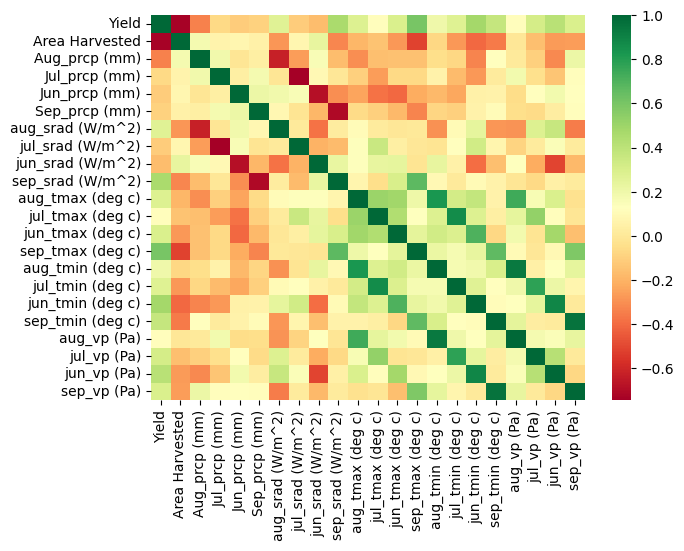

In [5]:
correlation = filtered_dataset.corr()
_, ax = plt.subplots(figsize = (7,5))
_ = sns.heatmap(correlation, ax = ax, cmap = 'RdYlGn', annot = False, fmt = '.1f', annot_kws={"size": 4})

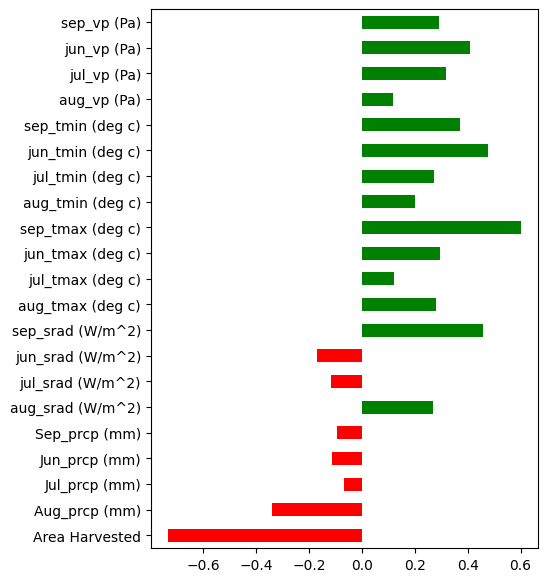

In [6]:
# Correlations
df_corr1 = correlation['Yield'][1:]
list1 = ['green' if x > 0 else 'red' for x in df_corr1]
_ = df_corr1.plot(kind = 'barh', figsize = (5,7), color = list1)

In [7]:
# data = dataset.drop(['Area Harvested'], axis=1)
data = dataset.copy()
data.set_index('date', inplace=True)
data

,Yield,Area Harvested,Aug_prcp (mm),Jul_prcp (mm),Jun_prcp (mm),Sep_prcp (mm),aug_srad (W/m^2),jul_srad (W/m^2),jun_srad (W/m^2),sep_srad (W/m^2),...,jun_tmax (deg c),sep_tmax (deg c),aug_tmin (deg c),jul_tmin (deg c),jun_tmin (deg c),sep_tmin (deg c),aug_vp (Pa),jul_vp (Pa),jun_vp (Pa),sep_vp (Pa)
date,,,,,,,,,,,,,,,,,,,,,
1980-12-31,23252,46390,82.6500,171.1225,97.833621,115.510714,351.994677,360.596048,404.417155,324.127411,...,21.366552,21.596786,17.206855,15.639113,10.389483,11.532857,1979.333145,1808.963226,1298.384655,1412.074107
1981-12-31,23729,47356,95.4500,99.4425,136.272321,155.394828,333.959032,382.391129,376.206250,279.627672,...,23.856161,19.732069,15.243790,15.842097,13.606429,11.800603,1758.285161,1829.448387,1578.962411,1464.165517
1982-12-31,22526,31166,85.6100,40.2000,141.897321,121.150862,362.746210,403.382339,370.001429,288.811983,...,20.529196,20.184483,13.044113,15.768629,11.623571,10.479310,1545.176694,1819.913710,1383.133750,1301.157500
1983-12-31,23689,47159,112.7850,145.5375,65.292857,57.318103,352.762177,361.725726,424.604911,325.372328,...,25.187589,22.393707,16.415484,16.610242,12.973839,11.948017,1893.806129,1937.883629,1529.818036,1469.525690
1984-12-31,21995,40645,89.8275,63.4925,122.322414,122.657143,344.606129,395.069758,389.616638,289.276964,...,24.401983,19.778750,15.984839,14.366613,13.719741,10.763571,1858.868710,1662.393145,1600.213879,1345.276250
1985-12-31,24233,39893,137.6650,76.4275,89.038393,72.561207,341.573548,380.927339,388.413393,319.423707,...,21.334821,22.175431,14.565726,14.818629,10.869554,12.151983,1680.862823,1702.412742,1315.523571,1505.815862
1986-12-31,21572,31298,89.1100,92.7700,98.488393,145.184483,374.865323,369.249677,382.647143,281.891379,...,22.706786,20.469828,13.266694,15.639113,11.972500,10.701983,1577.116048,1810.908226,1436.593839,1344.715259
1987-12-31,20781,29540,119.9275,37.8700,75.500893,70.189655,338.485323,394.473952,375.051071,298.444397,...,25.355357,20.836983,14.686935,17.340000,13.757411,11.718362,1694.318065,1744.795081,1503.840179,1412.375776
1988-12-31,20024,29136,85.7525,172.4800,6.069828,99.875893,341.538145,363.779597,441.621810,294.688661,...,25.293276,20.721429,16.553548,16.354516,11.424483,11.145536,1953.216694,1635.605081,1214.303621,1371.143482


In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler_Y = MinMaxScaler(feature_range=(0,1))

backup_data = data.copy()

new_data = data.copy()
print(data.shape)

scaled_data = scaler.fit_transform(data)
y_data = np.array(data['Yield']).reshape(-1,1)
print("Y_data shape:",y_data.shape)
scaled_Y = scaler_Y.fit_transform(y_data)
print(scaled_data[0])

(42, 22)
Y_data shape: (42, 1)
[0.36075101 0.97442347 0.47851554 0.79563772 0.45344409 0.39066297
 0.35205212 0.39025107 0.61360867 0.66042394 0.61095266 0.44057186
 0.11330377 0.41239219 0.90846372 0.41595281 0.         0.47290633
 0.88795328 0.61405869 0.14273304 0.4508109 ]


In [10]:
# Step 3: Create a sequence of data by shifting the data by one time step.
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        print(i+1,"th iteration")
        print("X:",data[i:(i + n_steps),:1])
        print('Y:',data[i + n_steps,:1])
        print()
        X.append(data[i:(i + n_steps),:])
        y.append(data[i + n_steps,:1])
    return np.array(X), np.array(y)

time_steps = 5 # Define the number of time steps in the sequence
sequence_data = scaled_data
X, y = create_sequences(scaled_data, time_steps)

# def create_sequences(data, timesteps):
#     X_train = []
#     Y_train = []

#     timesteps = timesteps
#     n_future  = 1
#     train = data

#     for i in range(timesteps,len(train)-n_future +1):
#         X_train.append(train[i-timesteps:i, 0:train.shape[1]])
#         Y_train.append(train[i + n_future - 1:i + n_future,0])

#     X = np.array(X_train.copy())
#     y = np.array(Y_train.copy())
    
#     return X,y

print(X.shape)
print(y.shape)

1 th iteration
X: [[0.36075101]
 [0.41405901]
 [0.27961556]
 [0.40958873]
 [0.22027269]]
Y: [0.47038444]

2 th iteration
X: [[0.41405901]
 [0.27961556]
 [0.40958873]
 [0.22027269]
 [0.47038444]]
Y: [0.17299955]

3 th iteration
X: [[0.27961556]
 [0.40958873]
 [0.22027269]
 [0.47038444]
 [0.17299955]]
Y: [0.08459991]

4 th iteration
X: [[0.40958873]
 [0.22027269]
 [0.47038444]
 [0.17299955]
 [0.08459991]]
Y: [0.]

5 th iteration
X: [[0.22027269]
 [0.47038444]
 [0.17299955]
 [0.08459991]
 [0.        ]]
Y: [0.52223961]

6 th iteration
X: [[0.47038444]
 [0.17299955]
 [0.08459991]
 [0.        ]
 [0.52223961]]
Y: [0.16383549]

7 th iteration
X: [[0.17299955]
 [0.08459991]
 [0.        ]
 [0.52223961]
 [0.16383549]]
Y: [0.65802414]

8 th iteration
X: [[0.08459991]
 [0.        ]
 [0.52223961]
 [0.16383549]
 [0.65802414]]
Y: [0.51464014]

9 th iteration
X: [[0.        ]
 [0.52223961]
 [0.16383549]
 [0.65802414]
 [0.51464014]]
Y: [0.51363433]

10 th iteration
X: [[0.52223961]
 [0.16383549]
 [0.658

In [11]:
y[0]

array([0.47038444])

In [12]:
scaled_data[5,0]

0.4703844434510507

## Model LSTM/

In [13]:
import keras
import keras.backend as K

def r2_Keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from keras.callbacks import *
from keras.layers import *
from keras.models import *

In [15]:
# from itertools import product

# best_score = float('inf')
# # # best_score = -9999
# # best_hyperparameters = {}

# # Step 3: Create a sequence of data by shifting the data by one time step.
# def create_sequences(data, n_steps):
#     X, y = [], []
#     for i in range(len(data) - n_steps):
#         X.append(data[i:(i + n_steps),:])
#         y.append(data[i + n_steps,:1])
#     return np.array(X), np.array(y)

# def create_model_lstm(x, y, unitsconv, unitslstm, unitsdense , activate, optime, lr, loss, batch, epoch):
    
#     # Model 7
#     model2 = Sequential()
#     model2.add(GRU(unitsconv, activation=activate, input_shape=x.shape[1:], return_sequences=True))
#     model2.add(GRU(unitslstm, activation=activate))
#     model2.add(Flatten())
#     model2.add(Dense(unitsdense,activation=activate))
#     model2.add(Dense(1, activation='linear'))
    
#     print("\n\n")
#     model2.summary()
#     print("\n")    
#     def r2_Keras(y_true, y_pred):
#         SS_res =  K.sum(K.square( y_true-y_pred ))
#         SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
#         return ( 1 - SS_res/(SS_tot + K.epsilon()) )
    
#     model2.compile(optimizer = optime(lr), loss=loss, metrics=[r2_Keras, 'mape'])    
    
#     batch = int(batch)
#     epoch = int(epoch)
#     callback = ModelCheckpoint(filepath='Models/checkpoint/Model7_checkpoint.hdf5',
#                               monitor='r2_Keras', mode='max', save_best_only=True, save_weights_only=True,
#                               verbose=False)
    
#     history = model2.fit(x, y,
#                        batch_size = batch,
#                        epochs = epoch,
#                        verbose = 0,
#                         callbacks=[callback],
#                        shuffle = False)
    
#     return model2, history

# # Define hyperparameter search space
# # models = [model1(), model2(), model3()]
# timesteps = [5] #TimeSteps for Data
# unitsconv_list = [16, 32, 64, 128]
# unitslstm_list = [32, 64, 128] # Number of LSTM Units
# unitsdense_list = [16, 32, 64] # Number of Dense units
# activate_list = ['relu', 'selu'] # Activation Function
# batch_size_list = [4, 8, 16] # Batch Size
# learning_rate_list = [0.005, 0.001, 0.0005, 0.0001] # Learning Rate
# optimizer_list = [keras.optimizers.Adamax] # Optimizer 
# loss_list = ['mse'] # Loss Function
# epoch_list = [80, 100]

# Full_list = product(timesteps, unitsconv_list, unitslstm_list, unitsdense_list, activate_list, batch_size_list, learning_rate_list, optimizer_list, loss_list, epoch_list)
# print("Iterations :",len(list(Full_list)))
# X_train, X_test, y_train, y_test = 0,0,0,0

# # Iterate through all combinations of hyperparameters
# for steps, convi, i, j, k, l, m, n, o, p in product(timesteps, unitsconv_list, unitslstm_list, unitsdense_list, activate_list, batch_size_list, learning_rate_list, optimizer_list, loss_list, epoch_list):
#     X, y = create_sequences(scaled_data, steps)
#     X_train = X[:-9]
#     y_train = y[:-9]
#     X_test = X[-9:]
#     y_test = y[-9:]
    
#     print(steps, convi, i, j, k, l, m, n, o, p)
#     model3, history = create_model_lstm(x=X_train, y=y_train, unitsconv=convi, unitslstm=i, unitsdense=j, activate=k, batch=l, lr=m, optime=n, loss=o, epoch=p)    
    
    
    
#     model3.load_weights("Models/checkpoint/Model7_checkpoint.hdf5")
#     y_pred1 = model3.predict(X_test)
#     y_pred2 = scaler_Y.inverse_transform(y_pred1.reshape(-1, 1))
#     y_true1 = y_test
#     y_true2 = scaler_Y.inverse_transform(y_true1.reshape(-1, 1))
#     score = mean_absolute_percentage_error(y_pred=y_pred2, y_true=y_true2)
#     print("Fit Complete for:", steps, convi, i, j, k, l, m, n, o, p)
#     print("\n\nCurrent Score:", score)
    
#     # Update best hyperparameters if the current score is better
#     if score < best_score:
#         best_score = score
#         best_hyperparameters = {"TimeSteps":steps, "unitsconv":convi, 'unitslstm': i, 'unitsdense': j, 'activate': k, 'batch': l, 'Optimizer': n, 'learning_rate': m, 'lossFunction': o, 'Epochs':p}
#         print("\n\nNew Best Score:", score, "Hyperparameters:", (steps, convi, i, j, k, l, m, n, o, p))
#         model3.save('Models/Model7.hdf5')
#         model3.save_weights("Models/Model7_weights.hdf5")

# print("\n\nBest Hyperparameters:", best_hyperparameters)
# print("Best Score:", best_score)


Iterations : 1728
5 16 32 16 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 5, 16)             1920      
                                                                 
 gru_1 (GRU)                 (None, 32)                4800      
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 7,265
Trainable params: 7,265
Non-trainable params: 0
____________________

 flatten_5 (Flatten)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 7,265
Trainable params: 7,265
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 165ms/step
Fit Complete for: 5 16 32 16 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.02449765161902255


New Best Score: 0.02449765161902255 Hyperparameters: (5, 16, 32, 16, 'relu', 4, 0.0005, <class 'keras.optimizers.legacy.adamax.Adamax'>, 'mse', 100)
5 16 32 16 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_6"
_______________________

Total params: 7,265
Trainable params: 7,265
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 16 32 16 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.023047797011202423
5 16 32 16 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_22 (GRU)                (None, 5, 16)             1920      
                                                                 
 gru_23 (GRU)                (None, 32)                4800      
                                                                 
 flatten_11 (Flatten)        (None, 32)                0         
                                                                 
 dense_22 (Dense)            (None, 16)   

_________________________________________________________________


1/1 [==============================] - 0s 162ms/step
Fit Complete for: 5 16 32 16 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.016571308404149235
5 16 32 16 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_34 (GRU)                (None, 5, 16)             1920      
                                                                 
 gru_35 (GRU)                (None, 32)                4800      
                                                                 
 flatten_17 (Flatten)        (None, 32)                0         
                                                                 
 dense_34 (Dense)            (None, 16)                528       
                                          



1/1 [==============================] - 0s 160ms/step
Fit Complete for: 5 16 32 16 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.1815414160915484
5 16 32 16 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_46 (GRU)                (None, 5, 16)             1920      
                                                                 
 gru_47 (GRU)                (None, 32)                4800      
                                                                 
 flatten_23 (Flatten)        (None, 32)                0         
                                                                 
 dense_46 (Dense)            (None, 16)                528       
                                                                 
 dense_47 (Dense)            (None, 1)    

_________________________________________________________________


1/1 [==============================] - 0s 179ms/step
Fit Complete for: 5 16 32 16 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.02189335524200849
5 16 32 16 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_58 (GRU)                (None, 5, 16)             1920      
                                                                 
 gru_59 (GRU)                (None, 32)                4800      
                                                                 
 flatten_29 (Flatten)        (None, 32)                0         
                                                                 
 dense_58 (Dense)            (None, 16)                528       
                                           



1/1 [==============================] - 0s 159ms/step
Fit Complete for: 5 16 32 16 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.03998760599146611
5 16 32 16 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_70 (GRU)                (None, 5, 16)             1920      
                                                                 
 gru_71 (GRU)                (None, 32)                4800      
                                                                 
 flatten_35 (Flatten)        (None, 32)                0         
                                                                 
 dense_70 (Dense)            (None, 16)                528       
                                                                 
 dense_71 (Dense)            (None, 1)       

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_82 (GRU)                (None, 5, 16)             1920      
                                                                 
 gru_83 (GRU)                (None, 32)                4800      
                                                                 
 flatten_41 (Flatten)        (None, 32)                0         
                                                                 
 dense_82 (Dense)            (None, 16)                528       
                                                                 
 dense_83 (Dense)            (None, 1)                 17        
                                                                 
Total params: 7,265
Trainable params: 7,265
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 176ms/step
Fit Complete for: 5

 Layer (type)                Output Shape              Param #   
 gru_94 (GRU)                (None, 5, 16)             1920      
                                                                 
 gru_95 (GRU)                (None, 32)                4800      
                                                                 
 flatten_47 (Flatten)        (None, 32)                0         
                                                                 
 dense_94 (Dense)            (None, 16)                528       
                                                                 
 dense_95 (Dense)            (None, 1)                 17        
                                                                 
Total params: 7,265
Trainable params: 7,265
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 16 32 16 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Ad

 gru_106 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_107 (GRU)               (None, 32)                4800      
                                                                 
 flatten_53 (Flatten)        (None, 32)                0         
                                                                 
 dense_106 (Dense)           (None, 32)                1056      
                                                                 
 dense_107 (Dense)           (None, 1)                 33        
                                                                 
Total params: 7,809
Trainable params: 7,809
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 160ms/step
Fit Complete for: 5 16 32 32 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.018860794006833645
5 16 32 32 rel

 gru_119 (GRU)               (None, 32)                4800      
                                                                 
 flatten_59 (Flatten)        (None, 32)                0         
                                                                 
 dense_118 (Dense)           (None, 32)                1056      
                                                                 
 dense_119 (Dense)           (None, 1)                 33        
                                                                 
Total params: 7,809
Trainable params: 7,809
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 16 32 32 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03956374983920922
5 16 32 32 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_60"
__________________________________________

                                                                 
 flatten_65 (Flatten)        (None, 32)                0         
                                                                 
 dense_130 (Dense)           (None, 32)                1056      
                                                                 
 dense_131 (Dense)           (None, 1)                 33        
                                                                 
Total params: 7,809
Trainable params: 7,809
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 175ms/step
Fit Complete for: 5 16 32 32 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.06226523709770596
5 16 32 32 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape

 flatten_71 (Flatten)        (None, 32)                0         
                                                                 
 dense_142 (Dense)           (None, 32)                1056      
                                                                 
 dense_143 (Dense)           (None, 1)                 33        
                                                                 
Total params: 7,809
Trainable params: 7,809
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 168ms/step
Fit Complete for: 5 16 32 32 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.24486515335299142
5 16 32 32 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_144 (GRU)               (None, 5, 16

 dense_154 (Dense)           (None, 32)                1056      
                                                                 
 dense_155 (Dense)           (None, 1)                 33        
                                                                 
Total params: 7,809
Trainable params: 7,809
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 159ms/step
Fit Complete for: 5 16 32 32 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.025401308546966244
5 16 32 32 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_156 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_157 (GRU)               (None, 32) 

                                                                 
 dense_167 (Dense)           (None, 1)                 33        
                                                                 
Total params: 7,809
Trainable params: 7,809
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 174ms/step
Fit Complete for: 5 16 32 32 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03283107520796832
5 16 32 32 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_168 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_169 (GRU)               (None, 32)                4800      
                                          

 dense_179 (Dense)           (None, 1)                 33        
                                                                 
Total params: 7,809
Trainable params: 7,809
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 171ms/step
Fit Complete for: 5 16 32 32 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.028529390808880634
5 16 32 32 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_90"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_180 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_181 (GRU)               (None, 32)                4800      
                                                                 
 flatten_90 (Flatten)        (None, 32) 

                                                                 
 dense_191 (Dense)           (None, 1)                 33        
                                                                 
Total params: 7,809
Trainable params: 7,809
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 16 32 32 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.11939027945086894
5 16 32 64 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_96"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_192 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_193 (GRU)               (None, 32)                4800      
                                         

                                                                 
Total params: 8,897
Trainable params: 8,897
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 165ms/step
Fit Complete for: 5 16 32 64 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.012495633699332466
5 16 32 64 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_102"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_204 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_205 (GRU)               (None, 32)                4800      
                                                                 
 flatten_102 (Flatten)       (None, 32)                0         
                                       

Total params: 8,897
Trainable params: 8,897
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 169ms/step
Fit Complete for: 5 16 32 64 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03205192204022138
5 16 32 64 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_108"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_216 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_217 (GRU)               (None, 32)                4800      
                                                                 
 flatten_108 (Flatten)       (None, 32)                0         
                                                                 
 dense_216 (Dense)           (None, 64)  

Total params: 8,897
Trainable params: 8,897
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 171ms/step
Fit Complete for: 5 16 32 64 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.04929147460345707
5 16 32 64 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_114"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_228 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_229 (GRU)               (None, 32)                4800      
                                                                 
 flatten_114 (Flatten)       (None, 32)                0         
                                                                 
 dense_228 (Dense)           (None, 64) 

_________________________________________________________________


1/1 [==============================] - 0s 191ms/step
Fit Complete for: 5 16 32 64 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.24351864410367086
5 16 32 64 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_120"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_240 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_241 (GRU)               (None, 32)                4800      
                                                                 
 flatten_120 (Flatten)       (None, 32)                0         
                                                                 
 dense_240 (Dense)           (None, 64)                2112      
                                          



1/1 [==============================] - 0s 174ms/step
Fit Complete for: 5 16 32 64 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.016541734927072442
5 16 32 64 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_126"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_252 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_253 (GRU)               (None, 32)                4800      
                                                                 
 flatten_126 (Flatten)       (None, 32)                0         
                                                                 
 dense_252 (Dense)           (None, 64)                2112      
                                                                 
 dense_253 (Dense)           (None, 1)   

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_264 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_265 (GRU)               (None, 32)                4800      
                                                                 
 flatten_132 (Flatten)       (None, 32)                0         
                                                                 
 dense_264 (Dense)           (None, 64)                2112      
                                                                 
 dense_265 (Dense)           (None, 1)                 65        
                                                                 
Total params: 8,897
Trainable params: 8,897
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 169ms/step
Fit Complete for: 5

 Layer (type)                Output Shape              Param #   
 gru_276 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_277 (GRU)               (None, 32)                4800      
                                                                 
 flatten_138 (Flatten)       (None, 32)                0         
                                                                 
 dense_276 (Dense)           (None, 64)                2112      
                                                                 
 dense_277 (Dense)           (None, 1)                 65        
                                                                 
Total params: 8,897
Trainable params: 8,897
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 161ms/step
Fit Complete for: 5 16 32 64 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Ada

 gru_288 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_289 (GRU)               (None, 64)                15744     
                                                                 
 flatten_144 (Flatten)       (None, 64)                0         
                                                                 
 dense_288 (Dense)           (None, 16)                1040      
                                                                 
 dense_289 (Dense)           (None, 1)                 17        
                                                                 
Total params: 18,721
Trainable params: 18,721
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 171ms/step
Fit Complete for: 5 16 64 16 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.01533154540406039
5 16 64 16 relu

 gru_300 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_301 (GRU)               (None, 64)                15744     
                                                                 
 flatten_150 (Flatten)       (None, 64)                0         
                                                                 
 dense_300 (Dense)           (None, 16)                1040      
                                                                 
 dense_301 (Dense)           (None, 1)                 17        
                                                                 
Total params: 18,721
Trainable params: 18,721
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 189ms/step
Fit Complete for: 5 16 64 16 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.061173661208425344
5 16 64 16 re

                                                                 
 gru_313 (GRU)               (None, 64)                15744     
                                                                 
 flatten_156 (Flatten)       (None, 64)                0         
                                                                 
 dense_312 (Dense)           (None, 16)                1040      
                                                                 
 dense_313 (Dense)           (None, 1)                 17        
                                                                 
Total params: 18,721
Trainable params: 18,721
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 175ms/step
Fit Complete for: 5 16 64 16 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.06931210570349633
5 16 64 16 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100

 gru_325 (GRU)               (None, 64)                15744     
                                                                 
 flatten_162 (Flatten)       (None, 64)                0         
                                                                 
 dense_324 (Dense)           (None, 16)                1040      
                                                                 
 dense_325 (Dense)           (None, 1)                 17        
                                                                 
Total params: 18,721
Trainable params: 18,721
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 199ms/step
Fit Complete for: 5 16 64 16 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.03786459184987075
5 16 64 16 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_163"
______________________________________

                                                                 
 flatten_168 (Flatten)       (None, 64)                0         
                                                                 
 dense_336 (Dense)           (None, 16)                1040      
                                                                 
 dense_337 (Dense)           (None, 1)                 17        
                                                                 
Total params: 18,721
Trainable params: 18,721
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 16 64 16 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.020413783724309263
5 16 64 16 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_169"
_________________________________________________________________
 Layer (type)                Output Sha

 flatten_174 (Flatten)       (None, 64)                0         
                                                                 
 dense_348 (Dense)           (None, 16)                1040      
                                                                 
 dense_349 (Dense)           (None, 1)                 17        
                                                                 
Total params: 18,721
Trainable params: 18,721
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 175ms/step
Fit Complete for: 5 16 64 16 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.05537622069940788
5 16 64 16 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_175"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_350 (GRU)               (None, 5,

                                                                 
 dense_360 (Dense)           (None, 16)                1040      
                                                                 
 dense_361 (Dense)           (None, 1)                 17        
                                                                 
Total params: 18,721
Trainable params: 18,721
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 165ms/step
Fit Complete for: 5 16 64 16 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.03457036355664139
5 16 64 16 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_181"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_362 (GRU)               (None, 5, 16)             1920      
                                      

 dense_372 (Dense)           (None, 16)                1040      
                                                                 
 dense_373 (Dense)           (None, 1)                 17        
                                                                 
Total params: 18,721
Trainable params: 18,721
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 189ms/step
Fit Complete for: 5 16 64 16 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.031370790194524975
5 16 64 16 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_187"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_374 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_375 (GRU)               (None, 6

                                                                 
 dense_385 (Dense)           (None, 1)                 33        
                                                                 
Total params: 19,777
Trainable params: 19,777
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 178ms/step
Fit Complete for: 5 16 64 32 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.026353305935240805
5 16 64 32 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_193"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_386 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_387 (GRU)               (None, 64)                15744     
                                       

 dense_397 (Dense)           (None, 1)                 33        
                                                                 
Total params: 19,777
Trainable params: 19,777
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 173ms/step
Fit Complete for: 5 16 64 32 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.08243977948618961
5 16 64 32 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_199"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_398 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_399 (GRU)               (None, 64)                15744     
                                                                 
 flatten_199 (Flatten)       (None, 64

                                                                 
Total params: 19,777
Trainable params: 19,777
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 175ms/step
Fit Complete for: 5 16 64 32 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.015515992916971331
5 16 64 32 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_205"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_410 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_411 (GRU)               (None, 64)                15744     
                                                                 
 flatten_205 (Flatten)       (None, 64)                0         
                                     

Total params: 19,777
Trainable params: 19,777
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 193ms/step
Fit Complete for: 5 16 64 32 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.029395117969970616
5 16 64 32 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_211"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_422 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_423 (GRU)               (None, 64)                15744     
                                                                 
 flatten_211 (Flatten)       (None, 64)                0         
                                                                 
 dense_422 (Dense)           (None, 3

Total params: 19,777
Trainable params: 19,777
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 173ms/step
Fit Complete for: 5 16 64 32 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.03885908018718097
5 16 64 32 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_217"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_434 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_435 (GRU)               (None, 64)                15744     
                                                                 
 flatten_217 (Flatten)       (None, 64)                0         
                                                                 
 dense_434 (Dense)           (None, 32) 

_________________________________________________________________


1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 16 64 32 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.06722611119705668
5 16 64 32 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_223"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_446 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_447 (GRU)               (None, 64)                15744     
                                                                 
 flatten_223 (Flatten)       (None, 64)                0         
                                                                 
 dense_446 (Dense)           (None, 32)                2080      
                                          



1/1 [==============================] - 0s 168ms/step
Fit Complete for: 5 16 64 32 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.01321406119350554
5 16 64 32 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_229"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_458 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_459 (GRU)               (None, 64)                15744     
                                                                 
 flatten_229 (Flatten)       (None, 64)                0         
                                                                 
 dense_458 (Dense)           (None, 32)                2080      
                                                                 
 dense_459 (Dense)           (None, 1)    

1/1 [==============================] - 0s 183ms/step
Fit Complete for: 5 16 64 32 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.01403651556359872
5 16 64 32 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_235"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_470 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_471 (GRU)               (None, 64)                15744     
                                                                 
 flatten_235 (Flatten)       (None, 64)                0         
                                                                 
 dense_470 (Dense)           (None, 32)                2080      
                                                                 
 dense_471 (Dense)           (None, 1)      

1/1 [==============================] - 0s 177ms/step
Fit Complete for: 5 16 64 64 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.021549556648092695
5 16 64 64 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_241"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_482 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_483 (GRU)               (None, 64)                15744     
                                                                 
 flatten_241 (Flatten)       (None, 64)                0         
                                                                 
 dense_482 (Dense)           (None, 64)                4160      
                                                                 
 dense_483 (Dense)           (None, 1)       

Fit Complete for: 5 16 64 64 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.06966191247350648
5 16 64 64 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_247"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_494 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_495 (GRU)               (None, 64)                15744     
                                                                 
 flatten_247 (Flatten)       (None, 64)                0         
                                                                 
 dense_494 (Dense)           (None, 64)                4160      
                                                                 
 dense_495 (Dense)           (None, 1)                 65        
                               

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_506 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_507 (GRU)               (None, 64)                15744     
                                                                 
 flatten_253 (Flatten)       (None, 64)                0         
                                                                 
 dense_506 (Dense)           (None, 64)                4160      
                                                                 
 dense_507 (Dense)           (None, 1)                 65        
                                                                 
Total params: 21,889
Trainable params: 21,889
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 180ms/step
Fit Complete for:

 Layer (type)                Output Shape              Param #   
 gru_518 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_519 (GRU)               (None, 64)                15744     
                                                                 
 flatten_259 (Flatten)       (None, 64)                0         
                                                                 
 dense_518 (Dense)           (None, 64)                4160      
                                                                 
 dense_519 (Dense)           (None, 1)                 65        
                                                                 
Total params: 21,889
Trainable params: 21,889
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 176ms/step
Fit Complete for: 5 16 64 64 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.A

 gru_530 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_531 (GRU)               (None, 64)                15744     
                                                                 
 flatten_265 (Flatten)       (None, 64)                0         
                                                                 
 dense_530 (Dense)           (None, 64)                4160      
                                                                 
 dense_531 (Dense)           (None, 1)                 65        
                                                                 
Total params: 21,889
Trainable params: 21,889
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 172ms/step
Fit Complete for: 5 16 64 64 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.029178345841287034
5 16 64 64 se

 gru_542 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_543 (GRU)               (None, 64)                15744     
                                                                 
 flatten_271 (Flatten)       (None, 64)                0         
                                                                 
 dense_542 (Dense)           (None, 64)                4160      
                                                                 
 dense_543 (Dense)           (None, 1)                 65        
                                                                 
Total params: 21,889
Trainable params: 21,889
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 187ms/step
Fit Complete for: 5 16 64 64 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03187224310998059
5 16 64 64 se

                                                                 
 gru_555 (GRU)               (None, 64)                15744     
                                                                 
 flatten_277 (Flatten)       (None, 64)                0         
                                                                 
 dense_554 (Dense)           (None, 64)                4160      
                                                                 
 dense_555 (Dense)           (None, 1)                 65        
                                                                 
Total params: 21,889
Trainable params: 21,889
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 206ms/step
Fit Complete for: 5 16 64 64 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.06883063251985858
5 16 64 64 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80

 gru_567 (GRU)               (None, 64)                15744     
                                                                 
 flatten_283 (Flatten)       (None, 64)                0         
                                                                 
 dense_566 (Dense)           (None, 64)                4160      
                                                                 
 dense_567 (Dense)           (None, 1)                 65        
                                                                 
Total params: 21,889
Trainable params: 21,889
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 172ms/step
Fit Complete for: 5 16 64 64 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.02334352178596039
5 16 64 64 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_284"
_____________________________________

                                                                 
 flatten_289 (Flatten)       (None, 128)               0         
                                                                 
 dense_578 (Dense)           (None, 16)                2064      
                                                                 
 dense_579 (Dense)           (None, 1)                 17        
                                                                 
Total params: 60,065
Trainable params: 60,065
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 174ms/step
Fit Complete for: 5 16 128 16 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.038523779355398365
5 16 128 16 relu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_290"
_________________________________________________________________
 Layer (type)                Output S

 flatten_295 (Flatten)       (None, 128)               0         
                                                                 
 dense_590 (Dense)           (None, 16)                2064      
                                                                 
 dense_591 (Dense)           (None, 1)                 17        
                                                                 
Total params: 60,065
Trainable params: 60,065
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 16 128 16 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.04951997156813022
5 16 128 16 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_296"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_592 (GRU)               (None, 5

                                                                 
 dense_602 (Dense)           (None, 16)                2064      
                                                                 
 dense_603 (Dense)           (None, 1)                 17        
                                                                 
Total params: 60,065
Trainable params: 60,065
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 193ms/step
Fit Complete for: 5 16 128 16 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.014469806312601342
5 16 128 16 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_302"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_604 (GRU)               (None, 5, 16)             1920      
                                   

 dense_614 (Dense)           (None, 16)                2064      
                                                                 
 dense_615 (Dense)           (None, 1)                 17        
                                                                 
Total params: 60,065
Trainable params: 60,065
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 179ms/step
Fit Complete for: 5 16 128 16 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.01765605421850278
5 16 128 16 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_308"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_616 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_617 (GRU)               (None,

                                                                 
 dense_627 (Dense)           (None, 1)                 17        
                                                                 
Total params: 60,065
Trainable params: 60,065
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 184ms/step
Fit Complete for: 5 16 128 16 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.0433434992143213
5 16 128 16 selu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_314"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_628 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_629 (GRU)               (None, 128)               56064     
                                       

 dense_639 (Dense)           (None, 1)                 17        
                                                                 
Total params: 60,065
Trainable params: 60,065
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 182ms/step
Fit Complete for: 5 16 128 16 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.017255568817694286
5 16 128 16 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_320"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_640 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_641 (GRU)               (None, 128)               56064     
                                                                 
 flatten_320 (Flatten)       (None, 

                                                                 
Total params: 60,065
Trainable params: 60,065
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 208ms/step
Fit Complete for: 5 16 128 16 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.025292096965700842
5 16 128 16 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_326"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_652 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_653 (GRU)               (None, 128)               56064     
                                                                 
 flatten_326 (Flatten)       (None, 128)               0         
                                   

Total params: 60,065
Trainable params: 60,065
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 169ms/step
Fit Complete for: 5 16 128 16 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.032166828576363736
5 16 128 16 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_332"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_664 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_665 (GRU)               (None, 128)               56064     
                                                                 
 flatten_332 (Flatten)       (None, 128)               0         
                                                                 
 dense_664 (Dense)           (None

Total params: 62,145
Trainable params: 62,145
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 16 128 32 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.04094550658327822
5 16 128 32 relu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_338"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_676 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_677 (GRU)               (None, 128)               56064     
                                                                 
 flatten_338 (Flatten)       (None, 128)               0         
                                                                 
 dense_676 (Dense)           (None, 32

Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 178ms/step
Fit Complete for: 5 16 128 32 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.06274373353127674
5 16 128 32 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_344"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_688 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_689 (GRU)               (None, 128)               56064     
                                                                 
 flatten_344 (Flatten)       (None, 128)               0         
                                                                 
 dense_688 (Dense)           (None, 32)                4128      
                 



1/1 [==============================] - 0s 203ms/step
Fit Complete for: 5 16 128 32 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.02669209545889084
5 16 128 32 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_350"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_700 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_701 (GRU)               (None, 128)               56064     
                                                                 
 flatten_350 (Flatten)       (None, 128)               0         
                                                                 
 dense_700 (Dense)           (None, 32)                4128      
                                                                 
 dense_701 (Dense)           (None, 1)  

1/1 [==============================] - 0s 192ms/step
Fit Complete for: 5 16 128 32 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.023997035591774074
5 16 128 32 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_356"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_712 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_713 (GRU)               (None, 128)               56064     
                                                                 
 flatten_356 (Flatten)       (None, 128)               0         
                                                                 
 dense_712 (Dense)           (None, 32)                4128      
                                                                 
 dense_713 (Dense)           (None, 1)  

1/1 [==============================] - 0s 174ms/step
Fit Complete for: 5 16 128 32 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.05131670047876859
5 16 128 32 selu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_362"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_724 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_725 (GRU)               (None, 128)               56064     
                                                                 
 flatten_362 (Flatten)       (None, 128)               0         
                                                                 
 dense_724 (Dense)           (None, 32)                4128      
                                                                 
 dense_725 (Dense)           (None, 1)      

1/1 [==============================] - 0s 168ms/step
Fit Complete for: 5 16 128 32 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.027925282089217702
5 16 128 32 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_368"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_736 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_737 (GRU)               (None, 128)               56064     
                                                                 
 flatten_368 (Flatten)       (None, 128)               0         
                                                                 
 dense_736 (Dense)           (None, 32)                4128      
                                                                 
 dense_737 (Dense)           (None, 1)    

1/1 [==============================] - 0s 165ms/step
Fit Complete for: 5 16 128 32 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.02942616601385019
5 16 128 32 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_374"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_748 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_749 (GRU)               (None, 128)               56064     
                                                                 
 flatten_374 (Flatten)       (None, 128)               0         
                                                                 
 dense_748 (Dense)           (None, 32)                4128      
                                                                 
 dense_749 (Dense)           (None, 1)    

1/1 [==============================] - 0s 210ms/step
Fit Complete for: 5 16 128 32 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03028766886196528
5 16 128 32 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_380"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_760 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_761 (GRU)               (None, 128)               56064     
                                                                 
 flatten_380 (Flatten)       (None, 128)               0         
                                                                 
 dense_760 (Dense)           (None, 32)                4128      
                                                                 
 dense_761 (Dense)           (None, 1)   

1/1 [==============================] - 0s 192ms/step
Fit Complete for: 5 16 128 64 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03420668071404954
5 16 128 64 relu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_386"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_772 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_773 (GRU)               (None, 128)               56064     
                                                                 
 flatten_386 (Flatten)       (None, 128)               0         
                                                                 
 dense_772 (Dense)           (None, 64)                8256      
                                                                 
 dense_773 (Dense)           (None, 1)      

1/1 [==============================] - 0s 180ms/step
Fit Complete for: 5 16 128 64 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.04053747857301979
5 16 128 64 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_392"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_784 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_785 (GRU)               (None, 128)               56064     
                                                                 
 flatten_392 (Flatten)       (None, 128)               0         
                                                                 
 dense_784 (Dense)           (None, 64)                8256      
                                                                 
 dense_785 (Dense)           (None, 1)     

1/1 [==============================] - 0s 213ms/step
Fit Complete for: 5 16 128 64 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.039263880445014304
5 16 128 64 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_398"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_796 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_797 (GRU)               (None, 128)               56064     
                                                                 
 flatten_398 (Flatten)       (None, 128)               0         
                                                                 
 dense_796 (Dense)           (None, 64)                8256      
                                                                 
 dense_797 (Dense)           (None, 1)   

1/1 [==============================] - 0s 158ms/step
Fit Complete for: 5 16 128 64 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03217439081999684
5 16 128 64 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_404"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_808 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_809 (GRU)               (None, 128)               56064     
                                                                 
 flatten_404 (Flatten)       (None, 128)               0         
                                                                 
 dense_808 (Dense)           (None, 64)                8256      
                                                                 
 dense_809 (Dense)           (None, 1)   

1/1 [==============================] - 0s 207ms/step
Fit Complete for: 5 16 128 64 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.036808181268868714
5 16 128 64 selu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_410"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_820 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_821 (GRU)               (None, 128)               56064     
                                                                 
 flatten_410 (Flatten)       (None, 128)               0         
                                                                 
 dense_820 (Dense)           (None, 64)                8256      
                                                                 
 dense_821 (Dense)           (None, 1)     

1/1 [==============================] - 0s 209ms/step
Fit Complete for: 5 16 128 64 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.033541346793636184
5 16 128 64 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_416"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_832 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_833 (GRU)               (None, 128)               56064     
                                                                 
 flatten_416 (Flatten)       (None, 128)               0         
                                                                 
 dense_832 (Dense)           (None, 64)                8256      
                                                                 
 dense_833 (Dense)           (None, 1)    

1/1 [==============================] - 0s 281ms/step
Fit Complete for: 5 16 128 64 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03575988462682684
5 16 128 64 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_422"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_844 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_845 (GRU)               (None, 128)               56064     
                                                                 
 flatten_422 (Flatten)       (None, 128)               0         
                                                                 
 dense_844 (Dense)           (None, 64)                8256      
                                                                 
 dense_845 (Dense)           (None, 1)    

Trainable params: 66,305
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 181ms/step
Fit Complete for: 5 16 128 64 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.026232580435986814
5 16 128 64 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_428"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_856 (GRU)               (None, 5, 16)             1920      
                                                                 
 gru_857 (GRU)               (None, 128)               56064     
                                                                 
 flatten_428 (Flatten)       (None, 128)               0         
                                                                 
 dense_856 (Dense)           (None, 64)                

_________________________________________________________________


1/1 [==============================] - 0s 178ms/step
Fit Complete for: 5 32 32 16 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.0354164798767103
5 32 32 16 relu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_434"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_868 (GRU)               (None, 5, 32)             5376      
                                                                 
 gru_869 (GRU)               (None, 32)                6336      
                                                                 
 flatten_434 (Flatten)       (None, 32)                0         
                                                                 
 dense_868 (Dense)           (None, 16)                528       
                                             



1/1 [==============================] - 0s 165ms/step
Fit Complete for: 5 32 32 16 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.0682070271281985
5 32 32 16 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_440"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_880 (GRU)               (None, 5, 32)             5376      
                                                                 
 gru_881 (GRU)               (None, 32)                6336      
                                                                 
 flatten_440 (Flatten)       (None, 32)                0         
                                                                 
 dense_880 (Dense)           (None, 16)                528       
                                                                 
 dense_881 (Dense)           (None, 1)      

Fit Complete for: 5 32 32 16 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.028679638658328115
5 32 32 16 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_446"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_892 (GRU)               (None, 5, 32)             5376      
                                                                 
 gru_893 (GRU)               (None, 32)                6336      
                                                                 
 flatten_446 (Flatten)       (None, 32)                0         
                                                                 
 dense_892 (Dense)           (None, 16)                528       
                                                                 
 dense_893 (Dense)           (None, 1)                 17        
                              

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_904 (GRU)               (None, 5, 32)             5376      
                                                                 
 gru_905 (GRU)               (None, 32)                6336      
                                                                 
 flatten_452 (Flatten)       (None, 32)                0         
                                                                 
 dense_904 (Dense)           (None, 16)                528       
                                                                 
 dense_905 (Dense)           (None, 1)                 17        
                                                                 
Total params: 12,257
Trainable params: 12,257
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 172ms/step
Fit Complete for:

 Layer (type)                Output Shape              Param #   
 gru_916 (GRU)               (None, 5, 32)             5376      
                                                                 
 gru_917 (GRU)               (None, 32)                6336      
                                                                 
 flatten_458 (Flatten)       (None, 32)                0         
                                                                 
 dense_916 (Dense)           (None, 16)                528       
                                                                 
 dense_917 (Dense)           (None, 1)                 17        
                                                                 
Total params: 12,257
Trainable params: 12,257
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 171ms/step
Fit Complete for: 5 32 32 16 selu 4 0.001 <class 'keras.optimizers.legacy.adamax.Ad

 gru_928 (GRU)               (None, 5, 32)             5376      
                                                                 
 gru_929 (GRU)               (None, 32)                6336      
                                                                 
 flatten_464 (Flatten)       (None, 32)                0         
                                                                 
 dense_928 (Dense)           (None, 16)                528       
                                                                 
 dense_929 (Dense)           (None, 1)                 17        
                                                                 
Total params: 12,257
Trainable params: 12,257
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 32 32 16 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.028487602781240337
5 32 32 16 sel

 gru_940 (GRU)               (None, 5, 32)             5376      
                                                                 
 gru_941 (GRU)               (None, 32)                6336      
                                                                 
 flatten_470 (Flatten)       (None, 32)                0         
                                                                 
 dense_940 (Dense)           (None, 16)                528       
                                                                 
 dense_941 (Dense)           (None, 1)                 17        
                                                                 
Total params: 12,257
Trainable params: 12,257
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 196ms/step
Fit Complete for: 5 32 32 16 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.023978003249021308
5 32 32 16 se

                                                                 
 gru_953 (GRU)               (None, 32)                6336      
                                                                 
 flatten_476 (Flatten)       (None, 32)                0         
                                                                 
 dense_952 (Dense)           (None, 16)                528       
                                                                 
 dense_953 (Dense)           (None, 1)                 17        
                                                                 
Total params: 12,257
Trainable params: 12,257
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 182ms/step
Fit Complete for: 5 32 32 16 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.019699537168668447
5 32 32 16 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 

 gru_965 (GRU)               (None, 32)                6336      
                                                                 
 flatten_482 (Flatten)       (None, 32)                0         
                                                                 
 dense_964 (Dense)           (None, 32)                1056      
                                                                 
 dense_965 (Dense)           (None, 1)                 33        
                                                                 
Total params: 12,801
Trainable params: 12,801
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 167ms/step
Fit Complete for: 5 32 32 32 relu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.02561799680436774
5 32 32 32 relu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_483"
________________________________________

                                                                 
 flatten_488 (Flatten)       (None, 32)                0         
                                                                 
 dense_976 (Dense)           (None, 32)                1056      
                                                                 
 dense_977 (Dense)           (None, 1)                 33        
                                                                 
Total params: 12,801
Trainable params: 12,801
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 172ms/step
Fit Complete for: 5 32 32 32 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.02038177579796972
5 32 32 32 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_489"
_________________________________________________________________
 Layer (type)                Output Shap

 flatten_494 (Flatten)       (None, 32)                0         
                                                                 
 dense_988 (Dense)           (None, 32)                1056      
                                                                 
 dense_989 (Dense)           (None, 1)                 33        
                                                                 
Total params: 12,801
Trainable params: 12,801
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 206ms/step
Fit Complete for: 5 32 32 32 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.09049352343853448
5 32 32 32 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_495"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_990 (GRU)               (None, 5,

                                                                 
 dense_1000 (Dense)          (None, 32)                1056      
                                                                 
 dense_1001 (Dense)          (None, 1)                 33        
                                                                 
Total params: 12,801
Trainable params: 12,801
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 176ms/step
Fit Complete for: 5 32 32 32 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.04356066883677258
5 32 32 32 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_501"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1002 (GRU)              (None, 5, 32)             5376      
                                    

 dense_1012 (Dense)          (None, 32)                1056      
                                                                 
 dense_1013 (Dense)          (None, 1)                 33        
                                                                 
Total params: 12,801
Trainable params: 12,801
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 178ms/step
Fit Complete for: 5 32 32 32 selu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.04185814406419275
5 32 32 32 selu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_507"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1014 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1015 (GRU)              (None, 32) 

                                                                 
 dense_1025 (Dense)          (None, 1)                 33        
                                                                 
Total params: 12,801
Trainable params: 12,801
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 183ms/step
Fit Complete for: 5 32 32 32 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.012798455351225606
5 32 32 32 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_513"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1026 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1027 (GRU)              (None, 32)                6336      
                                       

 dense_1037 (Dense)          (None, 1)                 33        
                                                                 
Total params: 12,801
Trainable params: 12,801
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 161ms/step
Fit Complete for: 5 32 32 32 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.05235609975817249
5 32 32 32 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_519"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1038 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1039 (GRU)              (None, 32)                6336      
                                                                 
 flatten_519 (Flatten)       (None, 32

                                                                 
Total params: 12,801
Trainable params: 12,801
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 207ms/step
Fit Complete for: 5 32 32 32 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.03989859856327545
5 32 32 32 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_525"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1050 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1051 (GRU)              (None, 32)                6336      
                                                                 
 flatten_525 (Flatten)       (None, 32)                0         
                                    

 dense_1061 (Dense)          (None, 1)                 65        
                                                                 
Total params: 13,889
Trainable params: 13,889
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 190ms/step
Fit Complete for: 5 32 32 64 relu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.04138634301377386
5 32 32 64 relu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_531"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1062 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1063 (GRU)              (None, 32)                6336      
                                                                 
 flatten_531 (Flatten)       (None, 32) 

                                                                 
Total params: 13,889
Trainable params: 13,889
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 192ms/step
Fit Complete for: 5 32 32 64 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.02869084060931991
5 32 32 64 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_537"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1074 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1075 (GRU)              (None, 32)                6336      
                                                                 
 flatten_537 (Flatten)       (None, 32)                0         
                                        

Total params: 13,889
Trainable params: 13,889
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 170ms/step
Fit Complete for: 5 32 32 64 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.04007485236464009
5 32 32 64 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_543"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1086 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1087 (GRU)              (None, 32)                6336      
                                                                 
 flatten_543 (Flatten)       (None, 32)                0         
                                                                 
 dense_1086 (Dense)          (None, 64

Total params: 13,889
Trainable params: 13,889
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 175ms/step
Fit Complete for: 5 32 32 64 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.04577311743901266
5 32 32 64 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_549"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1098 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1099 (GRU)              (None, 32)                6336      
                                                                 
 flatten_549 (Flatten)       (None, 32)                0         
                                                                 
 dense_1098 (Dense)          (None, 

Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 169ms/step
Fit Complete for: 5 32 32 64 selu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.037781941179927614
5 32 32 64 selu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_555"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1110 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1111 (GRU)              (None, 32)                6336      
                                                                 
 flatten_555 (Flatten)       (None, 32)                0         
                                                                 
 dense_1110 (Dense)          (None, 64)                2112      
                   



1/1 [==============================] - 0s 177ms/step
Fit Complete for: 5 32 32 64 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.022045613276907877
5 32 32 64 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_561"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1122 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1123 (GRU)              (None, 32)                6336      
                                                                 
 flatten_561 (Flatten)       (None, 32)                0         
                                                                 
 dense_1122 (Dense)          (None, 64)                2112      
                                                                 
 dense_1123 (Dense)          (None, 1)     

1/1 [==============================] - 0s 200ms/step
Fit Complete for: 5 32 32 64 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.031066483366650743
5 32 32 64 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_567"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1134 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1135 (GRU)              (None, 32)                6336      
                                                                 
 flatten_567 (Flatten)       (None, 32)                0         
                                                                 
 dense_1134 (Dense)          (None, 64)                2112      
                                                                 
 dense_1135 (Dense)          (None, 1)     

1/1 [==============================] - 0s 181ms/step
Fit Complete for: 5 32 32 64 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.03229886523709449
5 32 32 64 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_573"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1146 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1147 (GRU)              (None, 32)                6336      
                                                                 
 flatten_573 (Flatten)       (None, 32)                0         
                                                                 
 dense_1146 (Dense)          (None, 64)                2112      
                                                                 
 dense_1147 (Dense)          (None, 1)    

1/1 [==============================] - 0s 176ms/step
Fit Complete for: 5 32 64 16 relu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.01609091230232783
5 32 64 16 relu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_579"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1158 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1159 (GRU)              (None, 64)                18816     
                                                                 
 flatten_579 (Flatten)       (None, 64)                0         
                                                                 
 dense_1158 (Dense)          (None, 16)                1040      
                                                                 
 dense_1159 (Dense)          (None, 1)        

Fit Complete for: 5 32 64 16 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.043588466666313684
5 32 64 16 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_585"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1170 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1171 (GRU)              (None, 64)                18816     
                                                                 
 flatten_585 (Flatten)       (None, 64)                0         
                                                                 
 dense_1170 (Dense)          (None, 16)                1040      
                                                                 
 dense_1171 (Dense)          (None, 1)                 17        
                                

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1182 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1183 (GRU)              (None, 64)                18816     
                                                                 
 flatten_591 (Flatten)       (None, 64)                0         
                                                                 
 dense_1182 (Dense)          (None, 16)                1040      
                                                                 
 dense_1183 (Dense)          (None, 1)                 17        
                                                                 
Total params: 25,249
Trainable params: 25,249
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 222ms/step
Fit Complete for:

 Layer (type)                Output Shape              Param #   
 gru_1194 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1195 (GRU)              (None, 64)                18816     
                                                                 
 flatten_597 (Flatten)       (None, 64)                0         
                                                                 
 dense_1194 (Dense)          (None, 16)                1040      
                                                                 
 dense_1195 (Dense)          (None, 1)                 17        
                                                                 
Total params: 25,249
Trainable params: 25,249
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 193ms/step
Fit Complete for: 5 32 64 16 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.

 gru_1206 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1207 (GRU)              (None, 64)                18816     
                                                                 
 flatten_603 (Flatten)       (None, 64)                0         
                                                                 
 dense_1206 (Dense)          (None, 16)                1040      
                                                                 
 dense_1207 (Dense)          (None, 1)                 17        
                                                                 
Total params: 25,249
Trainable params: 25,249
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 201ms/step
Fit Complete for: 5 32 64 16 selu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.0211988193523736
5 32 64 16 selu

 gru_1218 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1219 (GRU)              (None, 64)                18816     
                                                                 
 flatten_609 (Flatten)       (None, 64)                0         
                                                                 
 dense_1218 (Dense)          (None, 16)                1040      
                                                                 
 dense_1219 (Dense)          (None, 1)                 17        
                                                                 
Total params: 25,249
Trainable params: 25,249
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 177ms/step
Fit Complete for: 5 32 64 16 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.05175325550359233
5 32 64 16 sel

                                                                 
 gru_1231 (GRU)              (None, 64)                18816     
                                                                 
 flatten_615 (Flatten)       (None, 64)                0         
                                                                 
 dense_1230 (Dense)          (None, 16)                1040      
                                                                 
 dense_1231 (Dense)          (None, 1)                 17        
                                                                 
Total params: 25,249
Trainable params: 25,249
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 176ms/step
Fit Complete for: 5 32 64 16 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.021443682294583228
5 32 64 16 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 8

 gru_1243 (GRU)              (None, 64)                18816     
                                                                 
 flatten_621 (Flatten)       (None, 64)                0         
                                                                 
 dense_1242 (Dense)          (None, 16)                1040      
                                                                 
 dense_1243 (Dense)          (None, 1)                 17        
                                                                 
Total params: 25,249
Trainable params: 25,249
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 171ms/step
Fit Complete for: 5 32 64 16 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.022516673681895343
5 32 64 16 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_622"
___________________________________

                                                                 
 flatten_627 (Flatten)       (None, 64)                0         
                                                                 
 dense_1254 (Dense)          (None, 32)                2080      
                                                                 
 dense_1255 (Dense)          (None, 1)                 33        
                                                                 
Total params: 26,305
Trainable params: 26,305
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 32 64 32 relu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.027294892219219574
5 32 64 32 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_628"
_________________________________________________________________
 Layer (type)                Output Sh

 flatten_633 (Flatten)       (None, 64)                0         
                                                                 
 dense_1266 (Dense)          (None, 32)                2080      
                                                                 
 dense_1267 (Dense)          (None, 1)                 33        
                                                                 
Total params: 26,305
Trainable params: 26,305
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 174ms/step
Fit Complete for: 5 32 64 32 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.07239358769021605
5 32 64 32 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_634"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1268 (GRU)              (None, 5, 3

                                                                 
 dense_1278 (Dense)          (None, 32)                2080      
                                                                 
 dense_1279 (Dense)          (None, 1)                 33        
                                                                 
Total params: 26,305
Trainable params: 26,305
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 194ms/step
Fit Complete for: 5 32 64 32 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.05218481549233721
5 32 64 32 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_640"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1280 (GRU)              (None, 5, 32)             5376      
                                      

 dense_1290 (Dense)          (None, 32)                2080      
                                                                 
 dense_1291 (Dense)          (None, 1)                 33        
                                                                 
Total params: 26,305
Trainable params: 26,305
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 178ms/step
Fit Complete for: 5 32 64 32 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.044745286731345875
5 32 64 32 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_646"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1292 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1293 (GRU)              (None,

                                                                 
 dense_1303 (Dense)          (None, 1)                 33        
                                                                 
Total params: 26,305
Trainable params: 26,305
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 173ms/step
Fit Complete for: 5 32 64 32 selu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.009287469065341468
5 32 64 32 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_652"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1304 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1305 (GRU)              (None, 64)                18816     
                                      

 dense_1314 (Dense)          (None, 32)                2080      
                                                                 
 dense_1315 (Dense)          (None, 1)                 33        
                                                                 
Total params: 26,305
Trainable params: 26,305
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 180ms/step
Fit Complete for: 5 32 64 32 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.015830995773988055
5 32 64 32 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_658"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1316 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1317 (GRU)              (None, 64)

                                                                 
 dense_1327 (Dense)          (None, 1)                 33        
                                                                 
Total params: 26,305
Trainable params: 26,305
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 174ms/step
Fit Complete for: 5 32 64 32 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.06058999008157621
5 32 64 32 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_664"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1328 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1329 (GRU)              (None, 64)                18816     
                                      

 dense_1339 (Dense)          (None, 1)                 33        
                                                                 
Total params: 26,305
Trainable params: 26,305
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 227ms/step
Fit Complete for: 5 32 64 32 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.04561398037193173
5 32 64 32 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_670"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1340 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1341 (GRU)              (None, 64)                18816     
                                                                 
 flatten_670 (Flatten)       (None, 

                                                                 
Total params: 28,417
Trainable params: 28,417
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 216ms/step
Fit Complete for: 5 32 64 64 relu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.032342782732886835
5 32 64 64 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_676"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1352 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1353 (GRU)              (None, 64)                18816     
                                                                 
 flatten_676 (Flatten)       (None, 64)                0         
                                      

Total params: 28,417
Trainable params: 28,417
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 214ms/step
Fit Complete for: 5 32 64 64 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.05816694137571748
5 32 64 64 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_682"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1364 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1365 (GRU)              (None, 64)                18816     
                                                                 
 flatten_682 (Flatten)       (None, 64)                0         
                                                                 
 dense_1364 (Dense)          (None, 64) 

Total params: 28,417
Trainable params: 28,417
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 183ms/step
Fit Complete for: 5 32 64 64 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.04043887199835957
5 32 64 64 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_688"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1376 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1377 (GRU)              (None, 64)                18816     
                                                                 
 flatten_688 (Flatten)       (None, 64)                0         
                                                                 
 dense_1376 (Dense)          (None, 64

Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 173ms/step
Fit Complete for: 5 32 64 64 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.023763364013231272
5 32 64 64 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_694"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1388 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1389 (GRU)              (None, 64)                18816     
                                                                 
 flatten_694 (Flatten)       (None, 64)                0         
                                                                 
 dense_1388 (Dense)          (None, 64)                4160      
               



1/1 [==============================] - 0s 177ms/step
Fit Complete for: 5 32 64 64 selu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.052219120979837004
5 32 64 64 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_700"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1400 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1401 (GRU)              (None, 64)                18816     
                                                                 
 flatten_700 (Flatten)       (None, 64)                0         
                                                                 
 dense_1400 (Dense)          (None, 64)                4160      
                                                                 
 dense_1401 (Dense)          (None, 1)    

1/1 [==============================] - 0s 167ms/step
Fit Complete for: 5 32 64 64 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.025805132557576025
5 32 64 64 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_706"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1412 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1413 (GRU)              (None, 64)                18816     
                                                                 
 flatten_706 (Flatten)       (None, 64)                0         
                                                                 
 dense_1412 (Dense)          (None, 64)                4160      
                                                                 
 dense_1413 (Dense)          (None, 1)       

1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 32 64 64 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.04133145814215064
5 32 64 64 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_712"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1424 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1425 (GRU)              (None, 64)                18816     
                                                                 
 flatten_712 (Flatten)       (None, 64)                0         
                                                                 
 dense_1424 (Dense)          (None, 64)                4160      
                                                                 
 dense_1425 (Dense)          (None, 1)      

Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 205ms/step
Fit Complete for: 5 32 64 64 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03878267046713998
5 32 64 64 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_718"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1436 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1437 (GRU)              (None, 64)                18816     
                                                                 
 flatten_718 (Flatten)       (None, 64)                0         
                                                                 
 dense_1436 (Dense)          (None, 64)                4160      
                



1/1 [==============================] - 0s 217ms/step
Fit Complete for: 5 32 128 16 relu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.014727242890525068
5 32 128 16 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_724"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1448 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1449 (GRU)              (None, 128)               62208     
                                                                 
 flatten_724 (Flatten)       (None, 128)               0         
                                                                 
 dense_1448 (Dense)          (None, 16)                2064      
                                                                 
 dense_1449 (Dense)          (None, 1)  

1/1 [==============================] - 0s 203ms/step
Fit Complete for: 5 32 128 16 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.0764034837210261
5 32 128 16 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_730"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1460 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1461 (GRU)              (None, 128)               62208     
                                                                 
 flatten_730 (Flatten)       (None, 128)               0         
                                                                 
 dense_1460 (Dense)          (None, 16)                2064      
                                                                 
 dense_1461 (Dense)          (None, 1)       

1/1 [==============================] - 0s 183ms/step
Fit Complete for: 5 32 128 16 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.04874218638816002
5 32 128 16 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_736"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1472 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1473 (GRU)              (None, 128)               62208     
                                                                 
 flatten_736 (Flatten)       (None, 128)               0         
                                                                 
 dense_1472 (Dense)          (None, 16)                2064      
                                                                 
 dense_1473 (Dense)          (None, 1)    

1/1 [==============================] - 0s 178ms/step
Fit Complete for: 5 32 128 16 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.030541628725509348
5 32 128 16 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_742"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1484 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1485 (GRU)              (None, 128)               62208     
                                                                 
 flatten_742 (Flatten)       (None, 128)               0         
                                                                 
 dense_1484 (Dense)          (None, 16)                2064      
                                                                 
 dense_1485 (Dense)          (None, 1) 

1/1 [==============================] - 0s 177ms/step
Fit Complete for: 5 32 128 16 selu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.029904092895749895
5 32 128 16 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_748"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1496 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1497 (GRU)              (None, 128)               62208     
                                                                 
 flatten_748 (Flatten)       (None, 128)               0         
                                                                 
 dense_1496 (Dense)          (None, 16)                2064      
                                                                 
 dense_1497 (Dense)          (None, 1)    

1/1 [==============================] - 0s 176ms/step
Fit Complete for: 5 32 128 16 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.015856137736695194
5 32 128 16 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_754"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1508 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1509 (GRU)              (None, 128)               62208     
                                                                 
 flatten_754 (Flatten)       (None, 128)               0         
                                                                 
 dense_1508 (Dense)          (None, 16)                2064      
                                                                 
 dense_1509 (Dense)          (None, 1)     

1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 32 128 16 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03432802783267442
5 32 128 16 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_760"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1520 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1521 (GRU)              (None, 128)               62208     
                                                                 
 flatten_760 (Flatten)       (None, 128)               0         
                                                                 
 dense_1520 (Dense)          (None, 16)                2064      
                                                                 
 dense_1521 (Dense)          (None, 1)    

1/1 [==============================] - 1s 803ms/step
Fit Complete for: 5 32 128 16 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.020944180829091243
5 32 128 16 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_766"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1532 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1533 (GRU)              (None, 128)               62208     
                                                                 
 flatten_766 (Flatten)       (None, 128)               0         
                                                                 
 dense_1532 (Dense)          (None, 16)                2064      
                                                                 
 dense_1533 (Dense)          (None, 1) 

1/1 [==============================] - 0s 173ms/step
Fit Complete for: 5 32 128 32 relu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.02664983727702779
5 32 128 32 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_772"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1544 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1545 (GRU)              (None, 128)               62208     
                                                                 
 flatten_772 (Flatten)       (None, 128)               0         
                                                                 
 dense_1544 (Dense)          (None, 32)                4128      
                                                                 
 dense_1545 (Dense)          (None, 1)     

1/1 [==============================] - 0s 234ms/step
Fit Complete for: 5 32 128 32 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.023494016263672046
5 32 128 32 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_778"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1556 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1557 (GRU)              (None, 128)               62208     
                                                                 
 flatten_778 (Flatten)       (None, 128)               0         
                                                                 
 dense_1556 (Dense)          (None, 32)                4128      
                                                                 
 dense_1557 (Dense)          (None, 1)     

1/1 [==============================] - 0s 180ms/step
Fit Complete for: 5 32 128 32 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.06419793059758246
5 32 128 32 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_784"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1568 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1569 (GRU)              (None, 128)               62208     
                                                                 
 flatten_784 (Flatten)       (None, 128)               0         
                                                                 
 dense_1568 (Dense)          (None, 32)                4128      
                                                                 
 dense_1569 (Dense)          (None, 1)    

1/1 [==============================] - 0s 179ms/step
Fit Complete for: 5 32 128 32 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.012941049976877514
5 32 128 32 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_790"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1580 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1581 (GRU)              (None, 128)               62208     
                                                                 
 flatten_790 (Flatten)       (None, 128)               0         
                                                                 
 dense_1580 (Dense)          (None, 32)                4128      
                                                                 
 dense_1581 (Dense)          (None, 1) 

1/1 [==============================] - 0s 179ms/step
Fit Complete for: 5 32 128 32 selu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03266107428605562
5 32 128 32 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_796"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1592 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1593 (GRU)              (None, 128)               62208     
                                                                 
 flatten_796 (Flatten)       (None, 128)               0         
                                                                 
 dense_1592 (Dense)          (None, 32)                4128      
                                                                 
 dense_1593 (Dense)          (None, 1)     

1/1 [==============================] - 0s 172ms/step
Fit Complete for: 5 32 128 32 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03552801951133075
5 32 128 32 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_802"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1604 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1605 (GRU)              (None, 128)               62208     
                                                                 
 flatten_802 (Flatten)       (None, 128)               0         
                                                                 
 dense_1604 (Dense)          (None, 32)                4128      
                                                                 
 dense_1605 (Dense)          (None, 1)      

1/1 [==============================] - 0s 188ms/step
Fit Complete for: 5 32 128 32 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.02728458202847107
5 32 128 32 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_808"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1616 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1617 (GRU)              (None, 128)               62208     
                                                                 
 flatten_808 (Flatten)       (None, 128)               0         
                                                                 
 dense_1616 (Dense)          (None, 32)                4128      
                                                                 
 dense_1617 (Dense)          (None, 1)    

1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 32 128 32 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.02203973030338324
5 32 128 32 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_814"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1628 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1629 (GRU)              (None, 128)               62208     
                                                                 
 flatten_814 (Flatten)       (None, 128)               0         
                                                                 
 dense_1628 (Dense)          (None, 32)                4128      
                                                                 
 dense_1629 (Dense)          (None, 1)  

1/1 [==============================] - 0s 177ms/step
Fit Complete for: 5 32 128 64 relu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.018932360375615666
5 32 128 64 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_820"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1640 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1641 (GRU)              (None, 128)               62208     
                                                                 
 flatten_820 (Flatten)       (None, 128)               0         
                                                                 
 dense_1640 (Dense)          (None, 64)                8256      
                                                                 
 dense_1641 (Dense)          (None, 1)    

1/1 [==============================] - 0s 165ms/step
Fit Complete for: 5 32 128 64 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.05024587950264061
5 32 128 64 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_826"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1652 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1653 (GRU)              (None, 128)               62208     
                                                                 
 flatten_826 (Flatten)       (None, 128)               0         
                                                                 
 dense_1652 (Dense)          (None, 64)                8256      
                                                                 
 dense_1653 (Dense)          (None, 1)      

1/1 [==============================] - 1s 690ms/step
Fit Complete for: 5 32 128 64 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.04004883439542897
5 32 128 64 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_832"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1664 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1665 (GRU)              (None, 128)               62208     
                                                                 
 flatten_832 (Flatten)       (None, 128)               0         
                                                                 
 dense_1664 (Dense)          (None, 64)                8256      
                                                                 
 dense_1665 (Dense)          (None, 1)    

1/1 [==============================] - 0s 196ms/step
Fit Complete for: 5 32 128 64 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.04165181409604049
5 32 128 64 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_838"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1676 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1677 (GRU)              (None, 128)               62208     
                                                                 
 flatten_838 (Flatten)       (None, 128)               0         
                                                                 
 dense_1676 (Dense)          (None, 64)                8256      
                                                                 
 dense_1677 (Dense)          (None, 1)  

1/1 [==============================] - 0s 187ms/step
Fit Complete for: 5 32 128 64 selu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03587099099679328
5 32 128 64 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_844"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1688 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1689 (GRU)              (None, 128)               62208     
                                                                 
 flatten_844 (Flatten)       (None, 128)               0         
                                                                 
 dense_1688 (Dense)          (None, 64)                8256      
                                                                 
 dense_1689 (Dense)          (None, 1)     

1/1 [==============================] - 0s 193ms/step
Fit Complete for: 5 32 128 64 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.05230534678987215
5 32 128 64 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_850"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1700 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1701 (GRU)              (None, 128)               62208     
                                                                 
 flatten_850 (Flatten)       (None, 128)               0         
                                                                 
 dense_1700 (Dense)          (None, 64)                8256      
                                                                 
 dense_1701 (Dense)          (None, 1)      

1/1 [==============================] - 0s 182ms/step
Fit Complete for: 5 32 128 64 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03167493107432253
5 32 128 64 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_856"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1712 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1713 (GRU)              (None, 128)               62208     
                                                                 
 flatten_856 (Flatten)       (None, 128)               0         
                                                                 
 dense_1712 (Dense)          (None, 64)                8256      
                                                                 
 dense_1713 (Dense)          (None, 1)    

1/1 [==============================] - 0s 169ms/step
Fit Complete for: 5 32 128 64 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.019801135820750913
5 32 128 64 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_862"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1724 (GRU)              (None, 5, 32)             5376      
                                                                 
 gru_1725 (GRU)              (None, 128)               62208     
                                                                 
 flatten_862 (Flatten)       (None, 128)               0         
                                                                 
 dense_1724 (Dense)          (None, 64)                8256      
                                                                 
 dense_1725 (Dense)          (None, 1) 

1/1 [==============================] - 0s 175ms/step
Fit Complete for: 5 64 32 16 relu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.02977230123427472
5 64 32 16 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_868"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1736 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_1737 (GRU)              (None, 32)                9408      
                                                                 
 flatten_868 (Flatten)       (None, 32)                0         
                                                                 
 dense_1736 (Dense)          (None, 16)                528       
                                                                 
 dense_1737 (Dense)          (None, 1)       

1/1 [==============================] - 0s 175ms/step
Fit Complete for: 5 64 32 16 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03286849721519691
5 64 32 16 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_874"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1748 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_1749 (GRU)              (None, 32)                9408      
                                                                 
 flatten_874 (Flatten)       (None, 32)                0         
                                                                 
 dense_1748 (Dense)          (None, 16)                528       
                                                                 
 dense_1749 (Dense)          (None, 1)        

Fit Complete for: 5 64 32 16 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.06027773648786864
5 64 32 16 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_880"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1760 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_1761 (GRU)              (None, 32)                9408      
                                                                 
 flatten_880 (Flatten)       (None, 32)                0         
                                                                 
 dense_1760 (Dense)          (None, 16)                528       
                                                                 
 dense_1761 (Dense)          (None, 1)                 17        
                               

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1772 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_1773 (GRU)              (None, 32)                9408      
                                                                 
 flatten_886 (Flatten)       (None, 32)                0         
                                                                 
 dense_1772 (Dense)          (None, 16)                528       
                                                                 
 dense_1773 (Dense)          (None, 1)                 17        
                                                                 
Total params: 26,849
Trainable params: 26,849
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 191ms/step
Fit Complete for:

 Layer (type)                Output Shape              Param #   
 gru_1784 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_1785 (GRU)              (None, 32)                9408      
                                                                 
 flatten_892 (Flatten)       (None, 32)                0         
                                                                 
 dense_1784 (Dense)          (None, 16)                528       
                                                                 
 dense_1785 (Dense)          (None, 1)                 17        
                                                                 
Total params: 26,849
Trainable params: 26,849
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 190ms/step
Fit Complete for: 5 64 32 16 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.A

 gru_1796 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_1797 (GRU)              (None, 32)                9408      
                                                                 
 flatten_898 (Flatten)       (None, 32)                0         
                                                                 
 dense_1796 (Dense)          (None, 16)                528       
                                                                 
 dense_1797 (Dense)          (None, 1)                 17        
                                                                 
Total params: 26,849
Trainable params: 26,849
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 185ms/step
Fit Complete for: 5 64 32 16 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.028774175081257982
5 64 32 16 sel

 gru_1808 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_1809 (GRU)              (None, 32)                9408      
                                                                 
 flatten_904 (Flatten)       (None, 32)                0         
                                                                 
 dense_1808 (Dense)          (None, 16)                528       
                                                                 
 dense_1809 (Dense)          (None, 1)                 17        
                                                                 
Total params: 26,849
Trainable params: 26,849
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 171ms/step
Fit Complete for: 5 64 32 16 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.038245460277102655
5 64 32 16 se

                                                                 
 gru_1821 (GRU)              (None, 32)                9408      
                                                                 
 flatten_910 (Flatten)       (None, 32)                0         
                                                                 
 dense_1820 (Dense)          (None, 16)                528       
                                                                 
 dense_1821 (Dense)          (None, 1)                 17        
                                                                 
Total params: 26,849
Trainable params: 26,849
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 64 32 16 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.08287039197500602
5 64 32 16 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 1

 gru_1833 (GRU)              (None, 32)                9408      
                                                                 
 flatten_916 (Flatten)       (None, 32)                0         
                                                                 
 dense_1832 (Dense)          (None, 32)                1056      
                                                                 
 dense_1833 (Dense)          (None, 1)                 33        
                                                                 
Total params: 27,393
Trainable params: 27,393
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 167ms/step
Fit Complete for: 5 64 32 32 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.021012495452056624
5 64 32 32 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_917"
_____________________________________

                                                                 
 flatten_922 (Flatten)       (None, 32)                0         
                                                                 
 dense_1844 (Dense)          (None, 32)                1056      
                                                                 
 dense_1845 (Dense)          (None, 1)                 33        
                                                                 
Total params: 27,393
Trainable params: 27,393
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 64 32 32 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.03239494487595417
5 64 32 32 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_923"
_________________________________________________________________
 Layer (type)                Output Shap

 flatten_928 (Flatten)       (None, 32)                0         
                                                                 
 dense_1856 (Dense)          (None, 32)                1056      
                                                                 
 dense_1857 (Dense)          (None, 1)                 33        
                                                                 
Total params: 27,393
Trainable params: 27,393
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 168ms/step
Fit Complete for: 5 64 32 32 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.02355184005911328
5 64 32 32 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_929"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1858 (GRU)              (None, 5,

                                                                 
 dense_1868 (Dense)          (None, 32)                1056      
                                                                 
 dense_1869 (Dense)          (None, 1)                 33        
                                                                 
Total params: 27,393
Trainable params: 27,393
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 160ms/step
Fit Complete for: 5 64 32 32 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.22300809500781224
5 64 32 32 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_935"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1870 (GRU)              (None, 5, 64)             16896     
                                    

 dense_1880 (Dense)          (None, 32)                1056      
                                                                 
 dense_1881 (Dense)          (None, 1)                 33        
                                                                 
Total params: 27,393
Trainable params: 27,393
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 160ms/step
Fit Complete for: 5 64 32 32 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.024952851935980555
5 64 32 32 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_941"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1882 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_1883 (GRU)              (None, 3

                                                                 
 dense_1893 (Dense)          (None, 1)                 33        
                                                                 
Total params: 27,393
Trainable params: 27,393
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 64 32 32 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.04328416653603652
5 64 32 32 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_947"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1894 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_1895 (GRU)              (None, 32)                9408      
                                        

 dense_1905 (Dense)          (None, 1)                 33        
                                                                 
Total params: 27,393
Trainable params: 27,393
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 224ms/step
Fit Complete for: 5 64 32 32 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.033655614014762664
5 64 32 32 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_953"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1906 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_1907 (GRU)              (None, 32)                9408      
                                                                 
 flatten_953 (Flatten)       (None, 3

                                                                 
Total params: 27,393
Trainable params: 27,393
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 180ms/step
Fit Complete for: 5 64 32 32 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.03592621512693329
5 64 32 32 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_959"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1918 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_1919 (GRU)              (None, 32)                9408      
                                                                 
 flatten_959 (Flatten)       (None, 32)                0         
                                    

Total params: 28,481
Trainable params: 28,481
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 214ms/step
Fit Complete for: 5 64 32 64 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.029507931394986017
5 64 32 64 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_965"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1930 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_1931 (GRU)              (None, 32)                9408      
                                                                 
 flatten_965 (Flatten)       (None, 32)                0         
                                                                 
 dense_1930 (Dense)          (None, 6

Total params: 28,481
Trainable params: 28,481
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 202ms/step
Fit Complete for: 5 64 32 64 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.01704098708085553
5 64 32 64 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_971"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1942 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_1943 (GRU)              (None, 32)                9408      
                                                                 
 flatten_971 (Flatten)       (None, 32)                0         
                                                                 
 dense_1942 (Dense)          (None, 64) 

_________________________________________________________________


1/1 [==============================] - 0s 179ms/step
Fit Complete for: 5 64 32 64 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.05124132486463296
5 64 32 64 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_977"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1954 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_1955 (GRU)              (None, 32)                9408      
                                                                 
 flatten_977 (Flatten)       (None, 32)                0         
                                                                 
 dense_1954 (Dense)          (None, 64)                2112      
                                          



1/1 [==============================] - 0s 175ms/step
Fit Complete for: 5 64 32 64 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.09725741064917309
5 64 32 64 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_983"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1966 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_1967 (GRU)              (None, 32)                9408      
                                                                 
 flatten_983 (Flatten)       (None, 32)                0         
                                                                 
 dense_1966 (Dense)          (None, 64)                2112      
                                                                 
 dense_1967 (Dense)          (None, 1)  

1/1 [==============================] - 0s 174ms/step
Fit Complete for: 5 64 32 64 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.028952232473192816
5 64 32 64 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_989"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1978 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_1979 (GRU)              (None, 32)                9408      
                                                                 
 flatten_989 (Flatten)       (None, 32)                0         
                                                                 
 dense_1978 (Dense)          (None, 64)                2112      
                                                                 
 dense_1979 (Dense)          (None, 1)     

Fit Complete for: 5 64 32 64 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.016154744458781147
5 64 32 64 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_995"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1990 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_1991 (GRU)              (None, 32)                9408      
                                                                 
 flatten_995 (Flatten)       (None, 32)                0         
                                                                 
 dense_1990 (Dense)          (None, 64)                2112      
                                                                 
 dense_1991 (Dense)          (None, 1)                 65        
                                

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2002 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2003 (GRU)              (None, 32)                9408      
                                                                 
 flatten_1001 (Flatten)      (None, 32)                0         
                                                                 
 dense_2002 (Dense)          (None, 64)                2112      
                                                                 
 dense_2003 (Dense)          (None, 1)                 65        
                                                                 
Total params: 28,481
Trainable params: 28,481
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 161ms/step
Fit Complete for:

 Layer (type)                Output Shape              Param #   
 gru_2014 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2015 (GRU)              (None, 32)                9408      
                                                                 
 flatten_1007 (Flatten)      (None, 32)                0         
                                                                 
 dense_2014 (Dense)          (None, 64)                2112      
                                                                 
 dense_2015 (Dense)          (None, 1)                 65        
                                                                 
Total params: 28,481
Trainable params: 28,481
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 162ms/step
Fit Complete for: 5 64 32 64 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.

 gru_2026 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2027 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1013 (Flatten)      (None, 64)                0         
                                                                 
 dense_2026 (Dense)          (None, 16)                1040      
                                                                 
 dense_2027 (Dense)          (None, 1)                 17        
                                                                 
Total params: 42,913
Trainable params: 42,913
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 170ms/step
Fit Complete for: 5 64 64 16 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.011166876593537298
5 64 64 16 r

 gru_2038 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2039 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1019 (Flatten)      (None, 64)                0         
                                                                 
 dense_2038 (Dense)          (None, 16)                1040      
                                                                 
 dense_2039 (Dense)          (None, 1)                 17        
                                                                 
Total params: 42,913
Trainable params: 42,913
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 169ms/step
Fit Complete for: 5 64 64 16 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.013075103414024434
5 64 64 16 re

                                                                 
 gru_2051 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1025 (Flatten)      (None, 64)                0         
                                                                 
 dense_2050 (Dense)          (None, 16)                1040      
                                                                 
 dense_2051 (Dense)          (None, 1)                 17        
                                                                 
Total params: 42,913
Trainable params: 42,913
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 219ms/step
Fit Complete for: 5 64 64 16 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.028379623925248523
5 64 64 16 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 8

 gru_2063 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1031 (Flatten)      (None, 64)                0         
                                                                 
 dense_2062 (Dense)          (None, 16)                1040      
                                                                 
 dense_2063 (Dense)          (None, 1)                 17        
                                                                 
Total params: 42,913
Trainable params: 42,913
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 198ms/step
Fit Complete for: 5 64 64 16 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.10222290104192394
5 64 64 16 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1032"
_____________________________________

                                                                 
 flatten_1037 (Flatten)      (None, 64)                0         
                                                                 
 dense_2074 (Dense)          (None, 16)                1040      
                                                                 
 dense_2075 (Dense)          (None, 1)                 17        
                                                                 
Total params: 42,913
Trainable params: 42,913
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 228ms/step
Fit Complete for: 5 64 64 16 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.028102113235153072
5 64 64 16 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1038"
_________________________________________________________________
 Layer (type)                Output 

 flatten_1043 (Flatten)      (None, 64)                0         
                                                                 
 dense_2086 (Dense)          (None, 16)                1040      
                                                                 
 dense_2087 (Dense)          (None, 1)                 17        
                                                                 
Total params: 42,913
Trainable params: 42,913
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 218ms/step
Fit Complete for: 5 64 64 16 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.02489491620707579
5 64 64 16 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1044"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2088 (GRU)              (None, 5,

                                                                 
 dense_2098 (Dense)          (None, 16)                1040      
                                                                 
 dense_2099 (Dense)          (None, 1)                 17        
                                                                 
Total params: 42,913
Trainable params: 42,913
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 196ms/step
Fit Complete for: 5 64 64 16 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.018952004011036652
5 64 64 16 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1050"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2100 (GRU)              (None, 5, 64)             16896     
                                    

 dense_2110 (Dense)          (None, 16)                1040      
                                                                 
 dense_2111 (Dense)          (None, 1)                 17        
                                                                 
Total params: 42,913
Trainable params: 42,913
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 176ms/step
Fit Complete for: 5 64 64 16 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.07669917365822716
5 64 64 32 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1056"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2112 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2113 (GRU)              (None, 6

                                                                 
 dense_2123 (Dense)          (None, 1)                 33        
                                                                 
Total params: 43,969
Trainable params: 43,969
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 198ms/step
Fit Complete for: 5 64 64 32 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.018073485914981202
5 64 64 32 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1062"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2124 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2125 (GRU)              (None, 64)                24960     
                                    

 dense_2135 (Dense)          (None, 1)                 33        
                                                                 
Total params: 43,969
Trainable params: 43,969
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 184ms/step
Fit Complete for: 5 64 64 32 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.013099711498017738
5 64 64 32 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1068"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2136 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2137 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1068 (Flatten)      (None, 6

                                                                 
Total params: 43,969
Trainable params: 43,969
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 170ms/step
Fit Complete for: 5 64 64 32 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.044742304141185886
5 64 64 32 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1074"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2148 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2149 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1074 (Flatten)      (None, 64)                0         
                                    

Total params: 43,969
Trainable params: 43,969
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 64 64 32 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.18542266135474164
5 64 64 32 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1080"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2160 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2161 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1080 (Flatten)      (None, 64)                0         
                                                                 
 dense_2160 (Dense)          (None, 3

Total params: 43,969
Trainable params: 43,969
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 178ms/step
Fit Complete for: 5 64 64 32 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.022031686482895902
5 64 64 32 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1086"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2172 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2173 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1086 (Flatten)      (None, 64)                0         
                                                                 
 dense_2172 (Dense)          (None, 

Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 172ms/step
Fit Complete for: 5 64 64 32 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.039935840548076924
5 64 64 32 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1092"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2184 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2185 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1092 (Flatten)      (None, 64)                0         
                                                                 
 dense_2184 (Dense)          (None, 32)                2080      
                 



1/1 [==============================] - 0s 167ms/step
Fit Complete for: 5 64 64 32 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.020081782914339406
5 64 64 32 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1098"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2196 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2197 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1098 (Flatten)      (None, 64)                0         
                                                                 
 dense_2196 (Dense)          (None, 32)                2080      
                                                                 
 dense_2197 (Dense)          (None, 1)  

1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 64 64 32 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.01035905891246492
5 64 64 64 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1104"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2208 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2209 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1104 (Flatten)      (None, 64)                0         
                                                                 
 dense_2208 (Dense)          (None, 64)                4160      
                                                                 
 dense_2209 (Dense)          (None, 1)     

1/1 [==============================] - 0s 178ms/step
Fit Complete for: 5 64 64 64 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03295817083111684
5 64 64 64 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1110"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2220 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2221 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1110 (Flatten)      (None, 64)                0         
                                                                 
 dense_2220 (Dense)          (None, 64)                4160      
                                                                 
 dense_2221 (Dense)          (None, 1)     

1/1 [==============================] - 0s 167ms/step
Fit Complete for: 5 64 64 64 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.010447490697791008
5 64 64 64 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1116"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2232 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2233 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1116 (Flatten)      (None, 64)                0         
                                                                 
 dense_2232 (Dense)          (None, 64)                4160      
                                                                 
 dense_2233 (Dense)          (None, 1)     

1/1 [==============================] - 0s 170ms/step
Fit Complete for: 5 64 64 64 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.032855927106097194
5 64 64 64 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1122"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2244 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2245 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1122 (Flatten)      (None, 64)                0         
                                                                 
 dense_2244 (Dense)          (None, 64)                4160      
                                                                 
 dense_2245 (Dense)          (None, 1)    

Trainable params: 46,081
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 222ms/step
Fit Complete for: 5 64 64 64 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.10915019859349898
5 64 64 64 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2256 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2257 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1128 (Flatten)      (None, 64)                0         
                                                                 
 dense_2256 (Dense)          (None, 64)                416

_________________________________________________________________


1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 64 64 64 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.040467575144697794
5 64 64 64 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1134"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2268 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2269 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1134 (Flatten)      (None, 64)                0         
                                                                 
 dense_2268 (Dense)          (None, 64)                4160      
                                        



1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 64 64 64 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03507839699044606
5 64 64 64 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1140"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2280 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2281 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1140 (Flatten)      (None, 64)                0         
                                                                 
 dense_2280 (Dense)          (None, 64)                4160      
                                                                 
 dense_2281 (Dense)          (None, 1)    

1/1 [==============================] - 0s 221ms/step
Fit Complete for: 5 64 64 64 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.04014717475468332
5 64 64 64 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1146"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2292 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2293 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1146 (Flatten)      (None, 64)                0         
                                                                 
 dense_2292 (Dense)          (None, 64)                4160      
                                                                 
 dense_2293 (Dense)          (None, 1)     

1/1 [==============================] - 0s 227ms/step
Fit Complete for: 5 64 64 64 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.02549519799447386
5 64 128 16 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1152"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2304 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2305 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1152 (Flatten)      (None, 128)               0         
                                                                 
 dense_2304 (Dense)          (None, 16)                2064      
                                                                 
 dense_2305 (Dense)          (None, 1)    

1/1 [==============================] - 0s 182ms/step
Fit Complete for: 5 64 128 16 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.01266310182599812
5 64 128 16 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1158"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2316 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2317 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1158 (Flatten)      (None, 128)               0         
                                                                 
 dense_2316 (Dense)          (None, 16)                2064      
                                                                 
 dense_2317 (Dense)          (None, 1)   

1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 64 128 16 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.024823938955501473
5 64 128 16 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1164"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2328 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2329 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1164 (Flatten)      (None, 128)               0         
                                                                 
 dense_2328 (Dense)          (None, 16)                2064      
                                                                 
 dense_2329 (Dense)          (None, 1)   

1/1 [==============================] - 0s 216ms/step
Fit Complete for: 5 64 128 16 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03554008786288864
5 64 128 16 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1170"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2340 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2341 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1170 (Flatten)      (None, 128)               0         
                                                                 
 dense_2340 (Dense)          (None, 16)                2064      
                                                                 
 dense_2341 (Dense)          (None, 1)   

1/1 [==============================] - 0s 186ms/step
Fit Complete for: 5 64 128 16 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.049721623823485384
5 64 128 16 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1176"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2352 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2353 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1176 (Flatten)      (None, 128)               0         
                                                                 
 dense_2352 (Dense)          (None, 16)                2064      
                                                                 
 dense_2353 (Dense)          (None, 1)  

1/1 [==============================] - 0s 290ms/step
Fit Complete for: 5 64 128 16 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.026047886616309985
5 64 128 16 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1182"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2364 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2365 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1182 (Flatten)      (None, 128)               0         
                                                                 
 dense_2364 (Dense)          (None, 16)                2064      
                                                                 
 dense_2365 (Dense)          (None, 1)  

1/1 [==============================] - 0s 222ms/step
Fit Complete for: 5 64 128 16 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.00927942301536515
5 64 128 16 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1188"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2376 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2377 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1188 (Flatten)      (None, 128)               0         
                                                                 
 dense_2376 (Dense)          (None, 16)                2064      
                                                                 
 dense_2377 (Dense)          (None, 1)    

1/1 [==============================] - 0s 192ms/step
Fit Complete for: 5 64 128 16 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.021452104699635856
5 64 128 16 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1194"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2388 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2389 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1194 (Flatten)      (None, 128)               0         
                                                                 
 dense_2388 (Dense)          (None, 16)                2064      
                                                                 
 dense_2389 (Dense)          (None, 1)  

1/1 [==============================] - 0s 191ms/step
Fit Complete for: 5 64 128 16 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.0457648255548669
5 64 128 32 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1200"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2400 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2401 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1200 (Flatten)      (None, 128)               0         
                                                                 
 dense_2400 (Dense)          (None, 32)                4128      
                                                                 
 dense_2401 (Dense)          (None, 1)    

1/1 [==============================] - 0s 211ms/step
Fit Complete for: 5 64 128 32 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.015312162504449948
5 64 128 32 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1206"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2412 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2413 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1206 (Flatten)      (None, 128)               0         
                                                                 
 dense_2412 (Dense)          (None, 32)                4128      
                                                                 
 dense_2413 (Dense)          (None, 1)  

1/1 [==============================] - 0s 218ms/step
Fit Complete for: 5 64 128 32 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.021495400219543603
5 64 128 32 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1212"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2424 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2425 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1212 (Flatten)      (None, 128)               0         
                                                                 
 dense_2424 (Dense)          (None, 32)                4128      
                                                                 
 dense_2425 (Dense)          (None, 1)   

1/1 [==============================] - 0s 221ms/step
Fit Complete for: 5 64 128 32 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03091059402284831
5 64 128 32 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1218"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2436 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2437 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1218 (Flatten)      (None, 128)               0         
                                                                 
 dense_2436 (Dense)          (None, 32)                4128      
                                                                 
 dense_2437 (Dense)          (None, 1)   

1/1 [==============================] - 0s 180ms/step
Fit Complete for: 5 64 128 32 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.06584308341591553
5 64 128 32 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2448 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2449 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1224 (Flatten)      (None, 128)               0         
                                                                 
 dense_2448 (Dense)          (None, 32)                4128      
                                                                 
 dense_2449 (Dense)          (None, 1)   

1/1 [==============================] - 0s 229ms/step
Fit Complete for: 5 64 128 32 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.024870592148834293
5 64 128 32 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1230"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2460 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2461 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1230 (Flatten)      (None, 128)               0         
                                                                 
 dense_2460 (Dense)          (None, 32)                4128      
                                                                 
 dense_2461 (Dense)          (None, 1)  

1/1 [==============================] - 0s 236ms/step
Fit Complete for: 5 64 128 32 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.02534617389120804
5 64 128 32 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1236"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2472 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2473 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1236 (Flatten)      (None, 128)               0         
                                                                 
 dense_2472 (Dense)          (None, 32)                4128      
                                                                 
 dense_2473 (Dense)          (None, 1)    

1/1 [==============================] - 0s 219ms/step
Fit Complete for: 5 64 128 32 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.019121398143692934
5 64 128 32 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1242"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2484 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2485 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1242 (Flatten)      (None, 128)               0         
                                                                 
 dense_2484 (Dense)          (None, 32)                4128      
                                                                 
 dense_2485 (Dense)          (None, 1)  

1/1 [==============================] - 0s 184ms/step
Fit Complete for: 5 64 128 32 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.036255810898164285
5 64 128 64 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1248"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2496 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2497 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1248 (Flatten)      (None, 128)               0         
                                                                 
 dense_2496 (Dense)          (None, 64)                8256      
                                                                 
 dense_2497 (Dense)          (None, 1)  

1/1 [==============================] - 0s 222ms/step
Fit Complete for: 5 64 128 64 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.01917820917337547
5 64 128 64 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1254"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2508 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2509 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1254 (Flatten)      (None, 128)               0         
                                                                 
 dense_2508 (Dense)          (None, 64)                8256      
                                                                 
 dense_2509 (Dense)          (None, 1)   

1/1 [==============================] - 0s 211ms/step
Fit Complete for: 5 64 128 64 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.01881638053558474
5 64 128 64 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1260"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2520 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2521 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1260 (Flatten)      (None, 128)               0         
                                                                 
 dense_2520 (Dense)          (None, 64)                8256      
                                                                 
 dense_2521 (Dense)          (None, 1)    

1/1 [==============================] - 0s 196ms/step
Fit Complete for: 5 64 128 64 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.02623254926768119
5 64 128 64 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1266"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2532 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2533 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1266 (Flatten)      (None, 128)               0         
                                                                 
 dense_2532 (Dense)          (None, 64)                8256      
                                                                 
 dense_2533 (Dense)          (None, 1)   

1/1 [==============================] - 0s 189ms/step
Fit Complete for: 5 64 128 64 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.07365771629877835
5 64 128 64 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1272"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2544 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2545 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1272 (Flatten)      (None, 128)               0         
                                                                 
 dense_2544 (Dense)          (None, 64)                8256      
                                                                 
 dense_2545 (Dense)          (None, 1)   

1/1 [==============================] - 0s 193ms/step
Fit Complete for: 5 64 128 64 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.008291403947575167
5 64 128 64 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1278"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2556 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2557 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1278 (Flatten)      (None, 128)               0         
                                                                 
 dense_2556 (Dense)          (None, 64)                8256      
                                                                 
 dense_2557 (Dense)          (None, 1)  

1/1 [==============================] - 0s 199ms/step
Fit Complete for: 5 64 128 64 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.01076586363496015
5 64 128 64 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1284"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2568 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2569 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1284 (Flatten)      (None, 128)               0         
                                                                 
 dense_2568 (Dense)          (None, 64)                8256      
                                                                 
 dense_2569 (Dense)          (None, 1)    

1/1 [==============================] - 0s 180ms/step
Fit Complete for: 5 64 128 64 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.0374173160363521
5 64 128 64 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1290"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2580 (GRU)              (None, 5, 64)             16896     
                                                                 
 gru_2581 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1290 (Flatten)      (None, 128)               0         
                                                                 
 dense_2580 (Dense)          (None, 64)                8256      
                                                                 
 dense_2581 (Dense)          (None, 1)    

1/1 [==============================] - 0s 175ms/step
Fit Complete for: 5 64 128 64 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.05580724302523916
5 128 32 16 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1296"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2592 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_2593 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1296 (Flatten)      (None, 32)                0         
                                                                 
 dense_2592 (Dense)          (None, 16)                528       
                                                                 
 dense_2593 (Dense)          (None, 1)   

1/1 [==============================] - 0s 219ms/step
Fit Complete for: 5 128 32 16 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.016008682663372423
5 128 32 16 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1302"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2604 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_2605 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1302 (Flatten)      (None, 32)                0         
                                                                 
 dense_2604 (Dense)          (None, 16)                528       
                                                                 
 dense_2605 (Dense)          (None, 1)  

1/1 [==============================] - 0s 190ms/step
Fit Complete for: 5 128 32 16 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.012526132273757226
5 128 32 16 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1308"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2616 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_2617 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1308 (Flatten)      (None, 32)                0         
                                                                 
 dense_2616 (Dense)          (None, 16)                528       
                                                                 
 dense_2617 (Dense)          (None, 1)   

1/1 [==============================] - 0s 180ms/step
Fit Complete for: 5 128 32 16 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.020892244335427856
5 128 32 16 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1314"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2628 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_2629 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1314 (Flatten)      (None, 32)                0         
                                                                 
 dense_2628 (Dense)          (None, 16)                528       
                                                                 
 dense_2629 (Dense)          (None, 1)  

1/1 [==============================] - 0s 177ms/step
Fit Complete for: 5 128 32 16 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.07235465156497438
5 128 32 16 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1320"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2640 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_2641 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1320 (Flatten)      (None, 32)                0         
                                                                 
 dense_2640 (Dense)          (None, 16)                528       
                                                                 
 dense_2641 (Dense)          (None, 1)   

1/1 [==============================] - 0s 189ms/step
Fit Complete for: 5 128 32 16 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03151575148019329
5 128 32 16 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1326"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2652 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_2653 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1326 (Flatten)      (None, 32)                0         
                                                                 
 dense_2652 (Dense)          (None, 16)                528       
                                                                 
 dense_2653 (Dense)          (None, 1)   

1/1 [==============================] - 0s 216ms/step
Fit Complete for: 5 128 32 16 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.021385553284302413
5 128 32 16 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1332"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2664 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_2665 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1332 (Flatten)      (None, 32)                0         
                                                                 
 dense_2664 (Dense)          (None, 16)                528       
                                                                 
 dense_2665 (Dense)          (None, 1)   

1/1 [==============================] - 0s 179ms/step
Fit Complete for: 5 128 32 16 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.022312867228274122
5 128 32 16 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1338"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2676 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_2677 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1338 (Flatten)      (None, 32)                0         
                                                                 
 dense_2676 (Dense)          (None, 16)                528       
                                                                 
 dense_2677 (Dense)          (None, 1)  

1/1 [==============================] - 0s 175ms/step
Fit Complete for: 5 128 32 16 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.017670300217837456
5 128 32 32 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1344"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2688 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_2689 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1344 (Flatten)      (None, 32)                0         
                                                                 
 dense_2688 (Dense)          (None, 32)                1056      
                                                                 
 dense_2689 (Dense)          (None, 1)  

1/1 [==============================] - 0s 191ms/step
Fit Complete for: 5 128 32 32 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.022787210930157547
5 128 32 32 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1350"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2700 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_2701 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1350 (Flatten)      (None, 32)                0         
                                                                 
 dense_2700 (Dense)          (None, 32)                1056      
                                                                 
 dense_2701 (Dense)          (None, 1)  

1/1 [==============================] - 0s 195ms/step
Fit Complete for: 5 128 32 32 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.026282629613494188
5 128 32 32 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1356"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2712 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_2713 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1356 (Flatten)      (None, 32)                0         
                                                                 
 dense_2712 (Dense)          (None, 32)                1056      
                                                                 
 dense_2713 (Dense)          (None, 1)   

1/1 [==============================] - 0s 181ms/step
Fit Complete for: 5 128 32 32 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03040200311089539
5 128 32 32 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1362"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2724 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_2725 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1362 (Flatten)      (None, 32)                0         
                                                                 
 dense_2724 (Dense)          (None, 32)                1056      
                                                                 
 dense_2725 (Dense)          (None, 1)   

1/1 [==============================] - 0s 179ms/step
Fit Complete for: 5 128 32 32 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.06831454171607654
5 128 32 32 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1368"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2736 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_2737 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1368 (Flatten)      (None, 32)                0         
                                                                 
 dense_2736 (Dense)          (None, 32)                1056      
                                                                 
 dense_2737 (Dense)          (None, 1)   

1/1 [==============================] - 0s 206ms/step
Fit Complete for: 5 128 32 32 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03387324826643129
5 128 32 32 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1374"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2748 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_2749 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1374 (Flatten)      (None, 32)                0         
                                                                 
 dense_2748 (Dense)          (None, 32)                1056      
                                                                 
 dense_2749 (Dense)          (None, 1)   

1/1 [==============================] - 0s 210ms/step
Fit Complete for: 5 128 32 32 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.02996648770311475
5 128 32 32 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1380"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2760 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_2761 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1380 (Flatten)      (None, 32)                0         
                                                                 
 dense_2760 (Dense)          (None, 32)                1056      
                                                                 
 dense_2761 (Dense)          (None, 1)    

1/1 [==============================] - 0s 187ms/step
Fit Complete for: 5 128 32 32 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.012404625806709544
5 128 32 32 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1386"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2772 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_2773 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1386 (Flatten)      (None, 32)                0         
                                                                 
 dense_2772 (Dense)          (None, 32)                1056      
                                                                 
 dense_2773 (Dense)          (None, 1)  

1/1 [==============================] - 0s 183ms/step
Fit Complete for: 5 128 32 32 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.042129582810761707
5 128 32 64 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1392"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2784 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_2785 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1392 (Flatten)      (None, 32)                0         
                                                                 
 dense_2784 (Dense)          (None, 64)                2112      
                                                                 
 dense_2785 (Dense)          (None, 1)  

1/1 [==============================] - 0s 222ms/step
Fit Complete for: 5 128 32 64 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.014933627144134388
5 128 32 64 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1398"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2796 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_2797 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1398 (Flatten)      (None, 32)                0         
                                                                 
 dense_2796 (Dense)          (None, 64)                2112      
                                                                 
 dense_2797 (Dense)          (None, 1)  

1/1 [==============================] - 0s 219ms/step
Fit Complete for: 5 128 32 64 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.025480168771058177
5 128 32 64 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1404"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2808 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_2809 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1404 (Flatten)      (None, 32)                0         
                                                                 
 dense_2808 (Dense)          (None, 64)                2112      
                                                                 
 dense_2809 (Dense)          (None, 1)   

1/1 [==============================] - 0s 195ms/step
Fit Complete for: 5 128 32 64 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03696624124936507
5 128 32 64 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1410"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2820 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_2821 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1410 (Flatten)      (None, 32)                0         
                                                                 
 dense_2820 (Dense)          (None, 64)                2112      
                                                                 
 dense_2821 (Dense)          (None, 1)   

1/1 [==============================] - 0s 187ms/step
Fit Complete for: 5 128 32 64 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.0604327287677944
5 128 32 64 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1416"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2832 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_2833 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1416 (Flatten)      (None, 32)                0         
                                                                 
 dense_2832 (Dense)          (None, 64)                2112      
                                                                 
 dense_2833 (Dense)          (None, 1)    

1/1 [==============================] - 0s 278ms/step
Fit Complete for: 5 128 32 64 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.0296029635045445
5 128 32 64 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1422"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2844 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_2845 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1422 (Flatten)      (None, 32)                0         
                                                                 
 dense_2844 (Dense)          (None, 64)                2112      
                                                                 
 dense_2845 (Dense)          (None, 1)    

1/1 [==============================] - 0s 162ms/step
Fit Complete for: 5 128 32 64 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.007953481892413164
5 128 32 64 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1428"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2856 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_2857 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1428 (Flatten)      (None, 32)                0         
                                                                 
 dense_2856 (Dense)          (None, 64)                2112      
                                                                 
 dense_2857 (Dense)          (None, 1)   

1/1 [==============================] - 0s 218ms/step
Fit Complete for: 5 128 32 64 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.011933283893772939
5 128 32 64 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1434"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2868 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_2869 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1434 (Flatten)      (None, 32)                0         
                                                                 
 dense_2868 (Dense)          (None, 64)                2112      
                                                                 
 dense_2869 (Dense)          (None, 1)  

1/1 [==============================] - 0s 222ms/step
Fit Complete for: 5 128 32 64 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.029953413167655683
5 128 64 16 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1440"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2880 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_2881 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1440 (Flatten)      (None, 64)                0         
                                                                 
 dense_2880 (Dense)          (None, 16)                1040      
                                                                 
 dense_2881 (Dense)          (None, 1)  

1/1 [==============================] - 0s 162ms/step
Fit Complete for: 5 128 64 16 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.020913781216060925
5 128 64 16 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1446"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2892 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_2893 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1446 (Flatten)      (None, 64)                0         
                                                                 
 dense_2892 (Dense)          (None, 16)                1040      
                                                                 
 dense_2893 (Dense)          (None, 1)  

1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 128 64 16 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.02214681904171082
5 128 64 16 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1452"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2904 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_2905 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1452 (Flatten)      (None, 64)                0         
                                                                 
 dense_2904 (Dense)          (None, 16)                1040      
                                                                 
 dense_2905 (Dense)          (None, 1)    

1/1 [==============================] - 0s 190ms/step
Fit Complete for: 5 128 64 16 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.0208453580707379
5 128 64 16 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1458"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2916 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_2917 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1458 (Flatten)      (None, 64)                0         
                                                                 
 dense_2916 (Dense)          (None, 16)                1040      
                                                                 
 dense_2917 (Dense)          (None, 1)    

1/1 [==============================] - 0s 172ms/step
Fit Complete for: 5 128 64 16 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.06808616476039915
5 128 64 16 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1464"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2928 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_2929 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1464 (Flatten)      (None, 64)                0         
                                                                 
 dense_2928 (Dense)          (None, 16)                1040      
                                                                 
 dense_2929 (Dense)          (None, 1)   

1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 128 64 16 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.027306302116552366
5 128 64 16 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1470"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2940 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_2941 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1470 (Flatten)      (None, 64)                0         
                                                                 
 dense_2940 (Dense)          (None, 16)                1040      
                                                                 
 dense_2941 (Dense)          (None, 1)  

1/1 [==============================] - 0s 175ms/step
Fit Complete for: 5 128 64 16 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.013962642425730908
5 128 64 16 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1476"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2952 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_2953 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1476 (Flatten)      (None, 64)                0         
                                                                 
 dense_2952 (Dense)          (None, 16)                1040      
                                                                 
 dense_2953 (Dense)          (None, 1)   

1/1 [==============================] - 0s 165ms/step
Fit Complete for: 5 128 64 16 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.014002116870119668
5 128 64 16 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1482"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2964 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_2965 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1482 (Flatten)      (None, 64)                0         
                                                                 
 dense_2964 (Dense)          (None, 16)                1040      
                                                                 
 dense_2965 (Dense)          (None, 1)  

1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 128 64 16 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.026761172306463583
5 128 64 32 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1488"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2976 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_2977 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1488 (Flatten)      (None, 64)                0         
                                                                 
 dense_2976 (Dense)          (None, 32)                2080      
                                                                 
 dense_2977 (Dense)          (None, 1)  

Trainable params: 97,729
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 128 64 32 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.02829872156769235
5 128 64 32 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1494"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2988 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_2989 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1494 (Flatten)      (None, 64)                0         
                                                                 
 dense_2988 (Dense)          (None, 32)                2

_________________________________________________________________


1/1 [==============================] - 0s 170ms/step
Fit Complete for: 5 128 64 32 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.016536683920552422
5 128 64 32 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1500"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3000 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3001 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1500 (Flatten)      (None, 64)                0         
                                                                 
 dense_3000 (Dense)          (None, 32)                2080      
                                       



1/1 [==============================] - 0s 173ms/step
Fit Complete for: 5 128 64 32 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03651921791309977
5 128 64 32 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1506"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3012 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3013 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1506 (Flatten)      (None, 64)                0         
                                                                 
 dense_3012 (Dense)          (None, 32)                2080      
                                                                 
 dense_3013 (Dense)          (None, 1) 

1/1 [==============================] - 0s 165ms/step
Fit Complete for: 5 128 64 32 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.13168604559609295
5 128 64 32 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1512"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3024 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3025 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1512 (Flatten)      (None, 64)                0         
                                                                 
 dense_3024 (Dense)          (None, 32)                2080      
                                                                 
 dense_3025 (Dense)          (None, 1)   

1/1 [==============================] - 0s 188ms/step
Fit Complete for: 5 128 64 32 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.025533047226400468
5 128 64 32 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1518"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3036 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3037 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1518 (Flatten)      (None, 64)                0         
                                                                 
 dense_3036 (Dense)          (None, 32)                2080      
                                                                 
 dense_3037 (Dense)          (None, 1)  

1/1 [==============================] - 0s 203ms/step
Fit Complete for: 5 128 64 32 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.032017493898992444
5 128 64 32 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1524"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3048 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3049 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1524 (Flatten)      (None, 64)                0         
                                                                 
 dense_3048 (Dense)          (None, 32)                2080      
                                                                 
 dense_3049 (Dense)          (None, 1)   

1/1 [==============================] - 0s 171ms/step
Fit Complete for: 5 128 64 32 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.011644038003852275
5 128 64 32 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1530"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3060 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3061 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1530 (Flatten)      (None, 64)                0         
                                                                 
 dense_3060 (Dense)          (None, 32)                2080      
                                                                 
 dense_3061 (Dense)          (None, 1)  

1/1 [==============================] - 0s 172ms/step
Fit Complete for: 5 128 64 32 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.033214544184244445
5 128 64 64 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1536"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3072 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3073 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1536 (Flatten)      (None, 64)                0         
                                                                 
 dense_3072 (Dense)          (None, 64)                4160      
                                                                 
 dense_3073 (Dense)          (None, 1)  

1/1 [==============================] - 0s 194ms/step
Fit Complete for: 5 128 64 64 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.010875484636755707
5 128 64 64 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1542"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3084 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3085 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1542 (Flatten)      (None, 64)                0         
                                                                 
 dense_3084 (Dense)          (None, 64)                4160      
                                                                 
 dense_3085 (Dense)          (None, 1)  

1/1 [==============================] - 0s 270ms/step
Fit Complete for: 5 128 64 64 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03417200068327456
5 128 64 64 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1548"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3096 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3097 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1548 (Flatten)      (None, 64)                0         
                                                                 
 dense_3096 (Dense)          (None, 64)                4160      
                                                                 
 dense_3097 (Dense)          (None, 1)    

1/1 [==============================] - 0s 192ms/step
Fit Complete for: 5 128 64 64 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.025296042430100116
5 128 64 64 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1554"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3108 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3109 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1554 (Flatten)      (None, 64)                0         
                                                                 
 dense_3108 (Dense)          (None, 64)                4160      
                                                                 
 dense_3109 (Dense)          (None, 1)  

1/1 [==============================] - 0s 186ms/step
Fit Complete for: 5 128 64 64 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.06842130351992486
5 128 64 64 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1560"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3120 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3121 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1560 (Flatten)      (None, 64)                0         
                                                                 
 dense_3120 (Dense)          (None, 64)                4160      
                                                                 
 dense_3121 (Dense)          (None, 1)   

1/1 [==============================] - 0s 234ms/step
Fit Complete for: 5 128 64 64 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.01607847380634178
5 128 64 64 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1566"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3132 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3133 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1566 (Flatten)      (None, 64)                0         
                                                                 
 dense_3132 (Dense)          (None, 64)                4160      
                                                                 
 dense_3133 (Dense)          (None, 1)   

1/1 [==============================] - 0s 252ms/step
Fit Complete for: 5 128 64 64 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.015314539949101293
5 128 64 64 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1572"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3144 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3145 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1572 (Flatten)      (None, 64)                0         
                                                                 
 dense_3144 (Dense)          (None, 64)                4160      
                                                                 
 dense_3145 (Dense)          (None, 1)   

1/1 [==============================] - 0s 221ms/step
Fit Complete for: 5 128 64 64 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.02845574761410697
5 128 64 64 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1578"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3156 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3157 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1578 (Flatten)      (None, 64)                0         
                                                                 
 dense_3156 (Dense)          (None, 64)                4160      
                                                                 
 dense_3157 (Dense)          (None, 1)   

1/1 [==============================] - 0s 262ms/step
Fit Complete for: 5 128 64 64 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.04289273315071953
5 128 128 16 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1584"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3168 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3169 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1584 (Flatten)      (None, 128)               0         
                                                                 
 dense_3168 (Dense)          (None, 16)                2064      
                                                                 
 dense_3169 (Dense)          (None, 1)  

1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 128 128 16 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.017254402169348024
5 128 128 16 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1590"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3180 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3181 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1590 (Flatten)      (None, 128)               0         
                                                                 
 dense_3180 (Dense)          (None, 16)                2064      
                                                                 
 dense_3181 (Dense)          (None, 1)

1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 128 128 16 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.01846091308827045
5 128 128 16 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1596"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3192 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3193 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1596 (Flatten)      (None, 128)               0         
                                                                 
 dense_3192 (Dense)          (None, 16)                2064      
                                                                 
 dense_3193 (Dense)          (None, 1)  

1/1 [==============================] - 0s 162ms/step
Fit Complete for: 5 128 128 16 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.039201530994776405
5 128 128 16 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1602"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3204 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3205 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1602 (Flatten)      (None, 128)               0         
                                                                 
 dense_3204 (Dense)          (None, 16)                2064      
                                                                 
 dense_3205 (Dense)          (None, 1)



1/1 [==============================] - 0s 161ms/step
Fit Complete for: 5 128 128 16 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.05684658933864454
5 128 128 16 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1608"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3216 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3217 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1608 (Flatten)      (None, 128)               0         
                                                                 
 dense_3216 (Dense)          (None, 16)                2064      
                                                                 
 dense_3217 (Dense)          (None, 1

Total params: 159,521
Trainable params: 159,521
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 178ms/step
Fit Complete for: 5 128 128 16 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.023884470502309955
5 128 128 16 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1614"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3228 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3229 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1614 (Flatten)      (None, 128)               0         
                                                                 
 dense_3228 (Dense)          (

                                                                 
Total params: 159,521
Trainable params: 159,521
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 179ms/step
Fit Complete for: 5 128 128 16 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.008103307444586648
5 128 128 16 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1620"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3240 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3241 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1620 (Flatten)      (None, 128)               0         
                               

                                                                 
Total params: 159,521
Trainable params: 159,521
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 161ms/step
Fit Complete for: 5 128 128 16 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.02682384456968452
5 128 128 16 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1626"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3252 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3253 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1626 (Flatten)      (None, 128)               0         
                               

                                                                 
Total params: 159,521
Trainable params: 159,521
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 181ms/step
Fit Complete for: 5 128 128 16 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.040687234710214085
5 128 128 32 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1632"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3264 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3265 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1632 (Flatten)      (None, 128)               0         
                              

Total params: 161,601
Trainable params: 161,601
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 174ms/step
Fit Complete for: 5 128 128 32 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.019228851722527925
5 128 128 32 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1638"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3276 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3277 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1638 (Flatten)      (None, 128)               0         
                                                                 
 dense_3276 (Dense)          (

Total params: 161,601
Trainable params: 161,601
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 185ms/step
Fit Complete for: 5 128 128 32 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.032191011416304774
5 128 128 32 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1644"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3288 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3289 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1644 (Flatten)      (None, 128)               0         
                                                                 
 dense_3288 (Dense)          (N

Total params: 161,601
Trainable params: 161,601
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 182ms/step
Fit Complete for: 5 128 128 32 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03510046441093317
5 128 128 32 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1650"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3300 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3301 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1650 (Flatten)      (None, 128)               0         
                                                                 
 dense_3300 (Dense)          (N

Total params: 161,601
Trainable params: 161,601
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 168ms/step
Fit Complete for: 5 128 128 32 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.06307596793570701
5 128 128 32 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1656"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3312 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3313 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1656 (Flatten)      (None, 128)               0         
                                                                 
 dense_3312 (Dense)          (N

Trainable params: 161,601
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 187ms/step
Fit Complete for: 5 128 128 32 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.031479429703493086
5 128 128 32 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1662"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3324 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3325 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1662 (Flatten)      (None, 128)               0         
                                                                 
 dense_3324 (Dense)          (None, 32)             

Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 211ms/step
Fit Complete for: 5 128 128 32 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.02089882741382329
5 128 128 32 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1668"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3336 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3337 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1668 (Flatten)      (None, 128)               0         
                                                                 
 dense_3336 (Dense)          (None, 32)                4128      
              

_________________________________________________________________


1/1 [==============================] - 0s 218ms/step
Fit Complete for: 5 128 128 32 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.01584897774427568
5 128 128 32 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1674"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3348 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3349 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1674 (Flatten)      (None, 128)               0         
                                                                 
 dense_3348 (Dense)          (None, 32)                4128      
                                     

_________________________________________________________________


1/1 [==============================] - 0s 214ms/step
Fit Complete for: 5 128 128 32 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.018104913762510888
5 128 128 64 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1680"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3360 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3361 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1680 (Flatten)      (None, 128)               0         
                                                                 
 dense_3360 (Dense)          (None, 64)                8256      
                                    



1/1 [==============================] - 0s 160ms/step
Fit Complete for: 5 128 128 64 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.01636519326058908
5 128 128 64 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1686"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3372 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3373 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1686 (Flatten)      (None, 128)               0         
                                                                 
 dense_3372 (Dense)          (None, 64)                8256      
                                                                 
 dense_3373 (Dense)          (None, 1

1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 128 128 64 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.02975326234369663
5 128 128 64 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1692"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3384 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3385 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1692 (Flatten)      (None, 128)               0         
                                                                 
 dense_3384 (Dense)          (None, 64)                8256      
                                                                 
 dense_3385 (Dense)          (None, 1)  

1/1 [==============================] - 0s 176ms/step
Fit Complete for: 5 128 128 64 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.04582250965270952
5 128 128 64 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1698"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3396 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3397 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1698 (Flatten)      (None, 128)               0         
                                                                 
 dense_3396 (Dense)          (None, 64)                8256      
                                                                 
 dense_3397 (Dense)          (None, 1) 



1/1 [==============================] - 0s 162ms/step
Fit Complete for: 5 128 128 64 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.05922978775241012
5 128 128 64 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1704"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3408 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3409 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1704 (Flatten)      (None, 128)               0         
                                                                 
 dense_3408 (Dense)          (None, 64)                8256      
                                                                 
 dense_3409 (Dense)          (None, 1

1/1 [==============================] - 0s 167ms/step
Fit Complete for: 5 128 128 64 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.04388707339437026
5 128 128 64 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1710"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3420 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3421 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1710 (Flatten)      (None, 128)               0         
                                                                 
 dense_3420 (Dense)          (None, 64)                8256      
                                                                 
 dense_3421 (Dense)          (None, 1) 

1/1 [==============================] - 0s 165ms/step
Fit Complete for: 5 128 128 64 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.013627490491290854
5 128 128 64 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1716"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3432 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3433 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1716 (Flatten)      (None, 128)               0         
                                                                 
 dense_3432 (Dense)          (None, 64)                8256      
                                                                 
 dense_3433 (Dense)          (None, 1) 



1/1 [==============================] - 0s 177ms/step
Fit Complete for: 5 128 128 64 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.01810746042101423
5 128 128 64 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1722"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3444 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3445 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1722 (Flatten)      (None, 128)               0         
                                                                 
 dense_3444 (Dense)          (None, 64)                8256      
                                                                 
 dense_3445 (Dense)          (None, 1



1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 128 128 64 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.04393310052256299


Best Hyperparameters: {'TimeSteps': 5, 'unitsconv': 128, 'unitslstm': 128, 'unitsdense': 16, 'activate': 'selu', 'batch': 4, 'Optimizer': <class 'keras.optimizers.legacy.adamax.Adamax'>, 'learning_rate': 0.0001, 'lossFunction': 'mse', 'Epochs': 100}
Best Score: 0.00393415334975038


    Best Hyperparameters: {
    'TimeSteps': 5,
    'unitsconv': 128,
    'unitslstm': 128,
    'unitsdense': 16,
    'activate': 'selu',
    'batch': 4, 
    'Optimizer': <class 'keras.optimizers.legacy.adamax.Adamax'>,
    'learning_rate': 0.0001, 'lossFunction': 'mse', 'Epochs': 100}
    Best Score: 0.00393415334975038

In [18]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:(i + n_steps),:])
        y.append(data[i + n_steps,:1])
    return np.array(X), np.array(y)

X,y = create_sequences(scaled_data, 5)
print("X.shape:",X.shape)
print("y.shape:",y.shape)
X_train = X[:-9]
y_train = y[:-9]
X_test = X[-9:]
y_test = y[-9:]

def finalize_lstm(unitsconv=128, unitslstm=128, unitsdense=16 , activate='selu'):    
    model2 = Sequential()
    model2.add(GRU(unitsconv, activation=activate, input_shape=X.shape[1:], return_sequences=True))
    model2.add(GRU(unitslstm, activation=activate))
    model2.add(Flatten())
    model2.add(Dense(unitsdense,activation=activate))
    model2.add(Dense(1, activation='linear'))
    
    return model2

model = finalize_lstm()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse', metrics=['mape'])
model.load_weights('Models/Model7_weights.hdf5')
model.summary()

X.shape: (37, 5, 22)
y.shape: (37, 1)
Model: "sequential_1729"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3456 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3457 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1728 (Flatten)      (None, 128)               0         
                                                                 
 dense_3456 (Dense)          (None, 16)                2064      
                                                                 
 dense_3457 (Dense)          (None, 1)                 17        
                                                                 
Total params: 159,521
Trainable params: 159,521
Non-trainable params: 0
_________________________________________________________________


In [19]:
# # new_X = X[-2:]
# # new_y = y[-2:]
# X = X[:-2]
# # y = y[:-2]

In [32]:
model.fit(X, y, batch_size=4, shuffle=False, epochs=100)

Epoch 1/100
10/10 [==============================] - 2s 4ms/step - loss: 0.0229 - mape: 5964968.0000
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0202 - mape: 6815785.5000
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0231 - mape: 8915255.0000
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0170 - mape: 4307000.0000
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0173 - mape: 3866778.7500
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0157 - mape: 5968969.0000
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0150 - mape: 5138057.5000
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0142 - mape: 3766828.0000
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0140 - mape: 4297898.0000
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0138 - mape: 50

10/10 [==============================] - 0s 4ms/step - loss: 0.0079 - mape: 3702550.5000
Epoch 82/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0109 - mape: 5925027.5000
Epoch 83/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0077 - mape: 1686549.5000
Epoch 84/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0117 - mape: 1311716.0000
Epoch 85/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0079 - mape: 2934000.5000
Epoch 86/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0128 - mape: 6680152.5000
Epoch 87/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0071 - mape: 2188682.0000
Epoch 88/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0109 - mape: 1054328.6250
Epoch 89/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0071 - mape: 2910865.2500
Epoch 90/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0106 - mape: 599000

In [33]:
y_pred = model.predict(X[:], batch_size=4)
y_pred_inv = scaler_Y.inverse_transform(y_pred)
y_pred_inv.shape

10/10 [==============================] - 0s 1ms/step


(37, 1)

In [34]:
y_true = y[:]
y_true_inv = scaler_Y.inverse_transform(y_true)
y_true_inv.shape

(37, 1)

In [35]:
score = mean_absolute_percentage_error(y_pred=y_pred_inv,y_true=y_true_inv)
score

0.015951923854586623

In [36]:
score = r2_score(y_pred=y_pred_inv, y_true=y_true_inv)
score

0.9406230154006792

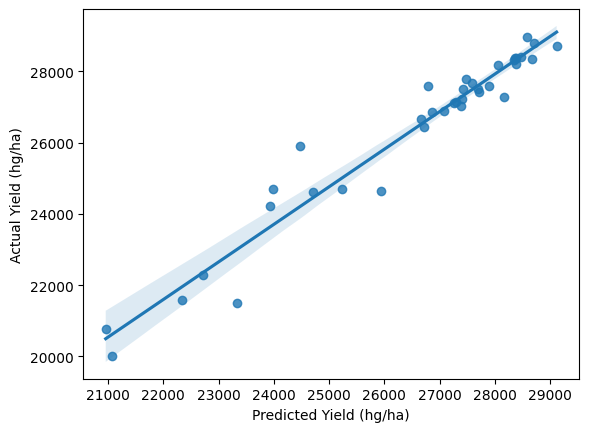

In [37]:
sns.regplot(x=y_pred_inv, y=y_true_inv)
plt.xlabel('Predicted Yield (hg/ha)')
plt.ylabel('Actual Yield (hg/ha)')
plt.show()

In [38]:
#  Step 1: Prepare the last time_steps data points from your original dataset
# last_data_points = scaled_data[-time_steps:]
last_data_points = scaled_data
print(last_data_points.shape)
future_yields = []

# def create_sequences(data, n_steps):
#     X, y = [], []
#     for i in range(len(data) - n_steps):
#         X.append(data[i:(i + n_steps),:])
#         y.append(data[i + n_steps,:1])
#     return np.array(X), np.array(y)

# time_steps = 4 # Define the number of time steps in the sequence
# sequence_data = scaled_data
# X, y = create_sequences(scaled_data, time_steps)
print("X.shape",X.shape)
print("Y.shape",y.shape)

last_data_points = X[-1]
print("last_data_points Shape:",last_data_points.shape)
future_yields = []

def finalize_lstm(unitsconv=128, unitslstm=128, unitsdense=16 , activate='selu'):    
    model2 = Sequential()
    model2.add(GRU(unitsconv, activation=activate, input_shape=X.shape[1:], return_sequences=True))
    model2.add(GRU(unitslstm, activation=activate))
    model2.add(Flatten())
    model2.add(Dense(unitsdense,activation=activate))
    model2.add(Dense(1, activation='linear'))
    
    return model2

model = finalize_lstm()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse', metrics=['mape'])
model.load_weights('Models/Model7_weights.hdf5')
model.summary()



(42, 22)
X.shape (37, 5, 22)
Y.shape (37, 1)
last_data_points Shape: (5, 22)
Model: "sequential_1730"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3458 (GRU)              (None, 5, 128)            58368     
                                                                 
 gru_3459 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1729 (Flatten)      (None, 128)               0         
                                                                 
 dense_3458 (Dense)          (None, 16)                2064      
                                                                 
 dense_3459 (Dense)          (None, 1)                 17        
                                                                 
Total params: 159,521
Trainable params: 159,521
Non-trainable params: 0
__________________________________

In [39]:
# Step 3: Forecast the yield for the future without having future X values
num_future_steps = 5
time_steps = 5

for i in range(num_future_steps):
    # Reshape the last_data_points to match the model's input shape
    print("LastDataPoints Shape:",last_data_points.shape)
    df_X = last_data_points[-time_steps:]
#     print(df_X)
    print("DF Shape:",df_X.shape)
    X_pred = df_X.reshape(1, time_steps, df_X.shape[1])
    print("X_pred shape:",X_pred.shape)

    # Use the trained model to make a prediction
    predicted_yield1 = model.predict(X_pred)
    pred = predicted_yield1[0, 0]
    print("pred shape:",pred.shape)

    # Inverse transform the predicted yield to get the original scale and extract the scalar value
    predicted_yield = scaler_Y.inverse_transform(predicted_yield1)[0, 0]
    future_yields.append(predicted_yield)
#     print(predicted_yield)
    print("InvTrans Shape:",predicted_yield.shape)

    # Append the predicted yield to the last_data_points for the next prediction
    last_data_points = np.append(last_data_points, [np.concatenate(([pred], df_X[-1, 1:]))], axis=0)
#     print(last_data_points[-time_steps:])
    print("NP Concat shape:",np.concatenate(([pred], df_X[-1, 1:])).shape)
    print("LastDataPoints:",last_data_points[-time_steps:].shape)

# Step 4: Inverse transform the entire forecasted data to get the original scale
forecasted_yield = scaler.inverse_transform(last_data_points)

print(last_data_points.shape)

# The forecasted_yield will contain the predicted yield values for the future time steps
# print("Forecasted Yields: ",np.round(future_yields))

print(forecasted_yield[-num_future_steps:,0])

LastDataPoints Shape: (5, 22)
DF Shape: (5, 22)
X_pred shape: (1, 5, 22)
1/1 [==============================] - 0s 174ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: (22,)
LastDataPoints: (5, 22)
LastDataPoints Shape: (6, 22)
DF Shape: (5, 22)
X_pred shape: (1, 5, 22)
1/1 [==============================] - 0s 13ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: (22,)
LastDataPoints: (5, 22)
LastDataPoints Shape: (7, 22)
DF Shape: (5, 22)
X_pred shape: (1, 5, 22)
1/1 [==============================] - 0s 13ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: (22,)
LastDataPoints: (5, 22)
LastDataPoints Shape: (8, 22)
DF Shape: (5, 22)
X_pred shape: (1, 5, 22)
1/1 [==============================] - 0s 13ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: (22,)
LastDataPoints: (5, 22)
LastDataPoints Shape: (9, 22)
DF Shape: (5, 22)
X_pred shape: (1, 5, 22)
1/1 [==============================] - 0s 12ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape:

In [ ]:
# scaled_new_y = scaler_Y.inverse_transform(new_y)
# scaled_new_y

In [41]:
print(X.shape)
pred = model.predict(X)
scaled_pred = y_pred_inv
y1 = y_true_inv
diff = y1 - scaled_pred
diff[:5]

(37, 5, 22)
2/2 [==============================] - 0s 2ms/step


array([[  296.8046875 ],
       [ -762.88867188],
       [ -176.40820312],
       [-1040.5703125 ],
       [  718.90429688]])

[datetime.date(2021, 12, 31) datetime.date(2022, 12, 31)
 datetime.date(2023, 12, 31) datetime.date(2024, 12, 31)
 datetime.date(2025, 12, 31)]
[23936, 22334, 20957, 21064, 23978, 23332, 24477, 25937, 24717, 27074, 26784, 28170, 27269, 26717, 27472, 22721, 25227, 28710, 28580, 27394, 26873, 27304, 26666, 27412, 27417, 27712, 27697, 27904, 27581, 28386, 29119, 28058, 28665, 28471, 28353, 28372, 28392]


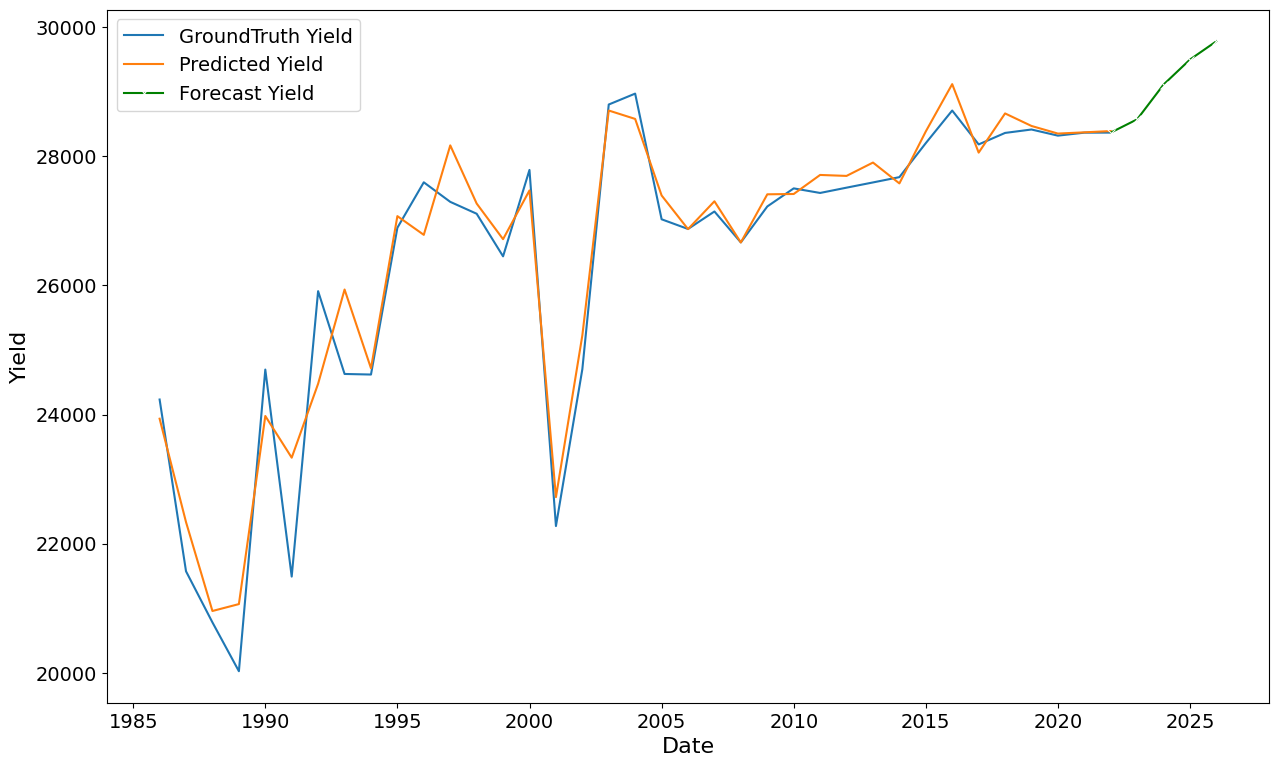

In [47]:
import matplotlib.pyplot as plt
date_range = pd.date_range(start='2021-12-31', periods=len(future_yields), freq='A-DEC')
date_range = date_range.date
print(date_range)

dataset = pd.read_csv("Monthly_dataset_1.csv")

new_data = pd.DataFrame({'date':date_range, 'Yield':future_yields})
existing_data =pd.DataFrame({'date':dataset['date'], 'Yield':dataset['Yield']})

appended_data = pd.concat([existing_data,new_data], ignore_index=True)

date_known = pd.to_datetime(dataset['date'][time_steps:])
y_predict = [int(i) for i in scaled_pred]
print(y_predict)
y_known = dataset['Yield'][time_steps:]
date_forecast = pd.to_datetime(date_range)
y_forecast = future_yields
# y_actual_forecast = [int(i) for i in scaled_new_y]


# plt.figure(figsize=(15, 9))
# sns.lineplot(x=date_known, y=y_known, label="GroundTruth Yield",)  # Add markers to the GroundTruth line
# sns.lineplot(x=date_known, y=y_predict, label='Predicted Yield', markers='--')  # Add markers to the Predicted line
# # sns.lineplot(x=date_forecast, y=y_forecast, label="Forecast Yield", marker='x')  # Add markers to the Forecast line
# plt.show()


plt.figure(figsize=(15, 9))
sns.lineplot(x=date_known, y=y_known, label="GroundTruth Yield")  # Add markers to the GroundTruth line
sns.lineplot(x=date_known, y=y_predict, label='Predicted Yield', markers='--')  # Add markers to the Predicted line
sns.lineplot(x=date_forecast, y=y_forecast, label="Forecast Yield", marker='x', color='green')  # Add markers to the Forecast line
# sns.lineplot(x=date_forecast[:2], y=y_actual_forecast, label="Real Yield at forecast", markers='x--')
plt.xlabel('Date', fontsize=16)  # Increase x-axis label font size
plt.ylabel('Yield', fontsize=16)  # Increase y-axis label font size
plt.xticks(fontsize=14)  # Increase x-axis tick label font size
plt.yticks(fontsize=14)  # Increase y-axis tick label font size
plt.legend(fontsize=14)  # Increase legend font size
# plt.grid()
# plt.show()
plt.savefig("Yield_Model8.png")

In [46]:
model.save("Models/Transfer_learned/Model8.hdf5")
model.save_weights("Models/Transfer_learned/Model8_weights.hdf5")

    Best Hyperparameters: {'TimeSteps': 5,
    'unitslstm': 64,
    'unitsdense': 64,
    'activate': 'relu',
    'batch': 16,
    'Optimizer': <class 'keras.optimizers.legacy.adamax.Adamax'>,
    'learning_rate': 0.0005, 'lossFunction': 'mse', 'Epochs': 120}
    Best Score: 0.0053880662259232735
    
    
    New Best Score: 0.0049161988386506456 Hyperparameters: (4, 32, 32, 'selu', 8, 0.005, <class 'keras.optimizers.legacy.adam.Adam'>, 'mse', 50)
    32 32 selu 8 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100

In [16]:
X.shape

(37, 5, 22)

In [17]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:(i + n_steps),:])
        y.append(data[i + n_steps,:1])
    return np.array(X), np.array(y)

X,y = create_sequences(scaled_data, 4)
print("X.shape:",X.shape)
print("y.shape:",y.shape)
X_train = X[:-9]
y_train = y[:-9]
X_test = X[-9:]
y_test = y[-9:]

def finalize_lstm(unitslstm, unitsdense , activate):    
    model = keras.models.Sequential()
    model.add(keras.layers.LSTM(unitslstm, activation=activate, input_shape=X.shape[1:]))
    model.add(keras.layers.Dense(unitsdense,activation=activate))
    model.add(keras.layers.Dense(1,activation='linear'))
    
    return model

model = finalize_lstm(unitslstm=32, unitsdense=32, activate='selu')
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005), loss='mse', metrics=['mape'])
model.load_weights('Models/Model5_weights.hdf5')
model.summary()

X.shape: (38, 4, 22)
y.shape: (38, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                7040      
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 8,129
Trainable params: 8,129
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X, y, batch_size=8, shuffle=False, epochs=50)

Epoch 1/50
5/5 [==============================] - 1s 2ms/step - loss: 0.0971 - mape: 7124902.5000
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0680 - mape: 12641807.0000
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0197 - mape: 4337588.0000
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0355 - mape: 9862698.0000
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0233 - mape: 4159080.5000
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0224 - mape: 3836522.5000
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0198 - mape: 4611708.5000
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0194 - mape: 2103233.5000
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0185 - mape: 5149697.0000
Epoch 10/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0166 - mape: 3222185.7500
Epoch 11/50
5/5 [=

In [19]:
y_pred = model.predict(X[:], batch_size=8)
y_pred_inv = scaler_Y.inverse_transform(y_pred)
y_pred_inv.shape

5/5 [==============================] - 0s 955us/step


(38, 1)

In [20]:
y_true = y[:]
y_true_inv = scaler_Y.inverse_transform(y_true)
y_true_inv.shape

(38, 1)

In [21]:
score = mean_absolute_percentage_error(y_pred=y_pred_inv,y_true=y_true_inv)
score

0.013458120672198811

In [22]:
score = r2_score(y_pred=y_pred_inv, y_true=y_true_inv)
score

0.968183062205816

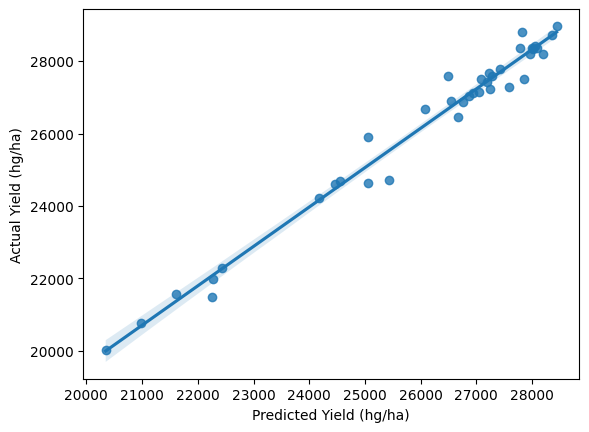

In [23]:
sns.regplot(x=y_pred_inv, y=y_true_inv)
plt.xlabel('Predicted Yield (hg/ha)')
plt.ylabel('Actual Yield (hg/ha)')
plt.show()

In [24]:
# Difference :

diff = y_true_inv - y_pred_inv
diff

array([[-269.87695312],
       [  51.72070312],
       [ -30.45117188],
       [-198.69140625],
       [-323.08789062],
       [ 153.265625  ],
       [-767.00585938],
       [ 858.10742188],
       [-433.703125  ],
       [ 156.90429688],
       [ 348.0625    ],
       [1115.40820312],
       [-283.73632812],
       [ 175.015625  ],
       [-220.25390625],
       [ 367.70703125],
       [-166.68554688],
       [-731.828125  ],
       [ 991.20703125],
       [ 531.77734375],
       [ 154.46875   ],
       [ 123.02734375],
       [  94.61523438],
       [ 585.92773438],
       [ -28.1640625 ],
       [ 429.71289062],
       [ 244.41992188],
       [-336.85742188],
       [ 323.99414062],
       [ 454.39453125],
       [   2.65234375],
       [ 344.64648438],
       [ 225.8046875 ],
       [ 281.92773438],
       [ 367.53125   ],
       [ 299.97265625],
       [ 587.09375   ],
       [ 376.29296875]])

#### Future Forecast

In [25]:
#  Step 1: Prepare the last time_steps data points from your original dataset
# last_data_points = scaled_data[-time_steps:]
last_data_points = scaled_data
print(last_data_points.shape)
future_yields = []

# def create_sequences(data, n_steps):
#     X, y = [], []
#     for i in range(len(data) - n_steps):
#         X.append(data[i:(i + n_steps),:])
#         y.append(data[i + n_steps,:1])
#     return np.array(X), np.array(y)

# time_steps = 4 # Define the number of time steps in the sequence
# sequence_data = scaled_data
# X, y = create_sequences(scaled_data, time_steps)
print("X.shape",X.shape)
print("Y.shape",y.shape)

last_data_points = X[-1]
print("last_data_points Shape:",last_data_points.shape)
future_yields = []

def finalize_lstm(unitslstm, unitsdense , activate):    
    model = keras.models.Sequential()
    model.add(keras.layers.LSTM(unitslstm, activation=activate, input_shape=X.shape[1:]))
    model.add(keras.layers.Dense(unitsdense,activation=activate))
    model.add(keras.layers.Dense(1,activation='linear'))
    
    return model

model = finalize_lstm(unitslstm=32, unitsdense=32, activate='selu')
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005), loss='mse', metrics=['mape', r2_score])
model.load_weights('Models/Model5_weights.hdf5')
model.summary()



(42, 22)
X.shape (38, 4, 22)
Y.shape (38, 1)
last_data_points Shape: (4, 22)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                7040      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 8,129
Trainable params: 8,129
Non-trainable params: 0
_________________________________________________________________


In [26]:
# # Step 2: Create a variable to store the number of future time steps you want to forecast
# num_future_steps = 3  # Change this according to your needs

# # Forecast future yields iteratively
# for _ in range(num_future_steps):
#     # Reshape the current_data to match the input shape of the model
#     current_data = current_data.reshape(1, time_steps, -1)
    
#     # Predict the next yield using the model
#     predicted_yield = model.predict(current_data)
    
#     # Append the predicted yield to the future_yields list
#     future_yields.append(predicted_yield[0, 0])
    
#     # Update current_data by removing the first time step and appending the predicted yield
#     current_data = np.concatenate((current_data[:, 1:, :], predicted_yield), axis=1)

# print("Predicted Future Yields:", future_yields)

In [27]:
# Step 3: Forecast the yield for the future without having future X values
num_future_steps = 5
time_steps = 4

for i in range(num_future_steps):
    # Reshape the last_data_points to match the model's input shape
    print("LastDataPoints Shape:",last_data_points.shape)
    df_X = last_data_points[-time_steps:]
#     print(df_X)
    print("DF Shape:",df_X.shape)
    X_pred = df_X.reshape(1, time_steps, df_X.shape[1])
    print("X_pred shape:",X_pred.shape)

    # Use the trained model to make a prediction
    predicted_yield1 = model.predict(X_pred)
    pred = predicted_yield1[0, 0]
    print("pred shape:",pred.shape)

    # Inverse transform the predicted yield to get the original scale and extract the scalar value
    predicted_yield = scaler_Y.inverse_transform(predicted_yield1)[0, 0]
    future_yields.append(predicted_yield)
#     print(predicted_yield)
    print("InvTrans Shape:",predicted_yield.shape)

    # Append the predicted yield to the last_data_points for the next prediction
    last_data_points = np.append(last_data_points, [np.concatenate(([pred], df_X[-1, 1:]))], axis=0)
#     print(last_data_points[-time_steps:])
    print("NP Concat shape:",np.concatenate(([pred], df_X[-1, 1:])).shape)
    print("LastDataPoints:",last_data_points[-time_steps:].shape)

# Step 4: Inverse transform the entire forecasted data to get the original scale
forecasted_yield = scaler.inverse_transform(last_data_points)

print(last_data_points.shape)

# The forecasted_yield will contain the predicted yield values for the future time steps
# print("Forecasted Yields: ",np.round(future_yields))

print(forecasted_yield[-num_future_steps:,0])

LastDataPoints Shape: (4, 22)
DF Shape: (4, 22)
X_pred shape: (1, 4, 22)
1/1 [==============================] - 0s 92ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: (22,)
LastDataPoints: (4, 22)
LastDataPoints Shape: (5, 22)
DF Shape: (4, 22)
X_pred shape: (1, 4, 22)
1/1 [==============================] - 0s 12ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: (22,)
LastDataPoints: (4, 22)
LastDataPoints Shape: (6, 22)
DF Shape: (4, 22)
X_pred shape: (1, 4, 22)
1/1 [==============================] - 0s 12ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: (22,)
LastDataPoints: (4, 22)
LastDataPoints Shape: (7, 22)
DF Shape: (4, 22)
X_pred shape: (1, 4, 22)
1/1 [==============================] - 0s 12ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: (22,)
LastDataPoints: (4, 22)
LastDataPoints Shape: (8, 22)
DF Shape: (4, 22)
X_pred shape: (1, 4, 22)
1/1 [==============================] - 0s 11ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: 

In [28]:
print(X.shape)
pred = model.predict(X)
scaled_pred = y_pred_inv
y1 = y_true_inv
diff = y1 - scaled_pred
diff

(38, 4, 22)
2/2 [==============================] - 0s 2ms/step


array([[-269.87695312],
       [  51.72070312],
       [ -30.45117188],
       [-198.69140625],
       [-323.08789062],
       [ 153.265625  ],
       [-767.00585938],
       [ 858.10742188],
       [-433.703125  ],
       [ 156.90429688],
       [ 348.0625    ],
       [1115.40820312],
       [-283.73632812],
       [ 175.015625  ],
       [-220.25390625],
       [ 367.70703125],
       [-166.68554688],
       [-731.828125  ],
       [ 991.20703125],
       [ 531.77734375],
       [ 154.46875   ],
       [ 123.02734375],
       [  94.61523438],
       [ 585.92773438],
       [ -28.1640625 ],
       [ 429.71289062],
       [ 244.41992188],
       [-336.85742188],
       [ 323.99414062],
       [ 454.39453125],
       [   2.65234375],
       [ 344.64648438],
       [ 225.8046875 ],
       [ 281.92773438],
       [ 367.53125   ],
       [ 299.97265625],
       [ 587.09375   ],
       [ 376.29296875]])

In [29]:
# import matplotlib.pyplot as plt
# date_range = pd.date_range(start='2022-12-31', periods=len(future_yields), freq='A-DEC')
# date_range = date_range.date
# print(date_range)

# dataset = pd.read_csv("Monthly_dataset_1.csv")

# new_data = pd.DataFrame({'date':date_range, 'Yield':future_yields})
# existing_data =pd.DataFrame({'date':dataset['date'], 'Yield':dataset['Yield']})

# appended_data = pd.concat([existing_data,new_data], ignore_index=True)

# date_known = pd.to_datetime(dataset['date'])[5:]
# y_predict = [int(i) for i in scaled_pred]
# print(y_predict)
# # y_known = dataset['Yield'][time_steps:]

# y_known = [int(i) for i in y1]
# print(y_known)
# date_forecast = pd.to_datetime(date_range)
# y_forecast = forecasted_yield[-num_future_steps:, 0]


# # plt.figure(figsize=(15, 9))
# # sns.lineplot(x=date_known, y=y_known, label="GroundTruth Yield",)  # Add markers to the GroundTruth line
# # sns.lineplot(x=date_known, y=y_predict, label='Predicted Yield', markers='--')  # Add markers to the Predicted line
# # # sns.lineplot(x=date_forecast, y=y_forecast, label="Forecast Yield", marker='x')  # Add markers to the Forecast line
# # plt.show()


# plt.figure(figsize=(15, 9))
# sns.lineplot(x=date_known, y=y_known, label="GroundTruth Yield")  # Add markers to the GroundTruth line
# sns.lineplot(x=date_known, y=y_predict, label='Predicted Yield', markers='--')  # Add markers to the Predicted line
# sns.lineplot(x=date_forecast, y=y_forecast, label="Forecast Yield", marker='x')  # Add markers to the Forecast line
# plt.xlabel('Date', fontsize=16)  # Increase x-axis label font size
# plt.ylabel('Yield', fontsize=16)  # Increase y-axis label font size
# plt.xticks(fontsize=14)  # Increase x-axis tick label font size
# plt.yticks(fontsize=14)  # Increase y-axis tick label font size
# plt.legend(fontsize=14)  # Increase legend font size
# plt.grid()
# plt.show()

[datetime.date(2022, 12, 31) datetime.date(2023, 12, 31)
 datetime.date(2024, 12, 31) datetime.date(2025, 12, 31)
 datetime.date(2026, 12, 31)]
[22264, 24181, 21602, 20979, 20347, 24543, 22257, 25053, 25062, 24463, 26545, 26482, 27578, 26935, 26671, 27422, 22439, 25434, 27811, 28440, 26870, 26751, 27051, 26081, 27252, 27074, 27188, 27851, 27272, 27223, 28202, 28365, 27959, 28081, 28048, 28021, 27779, 27991]


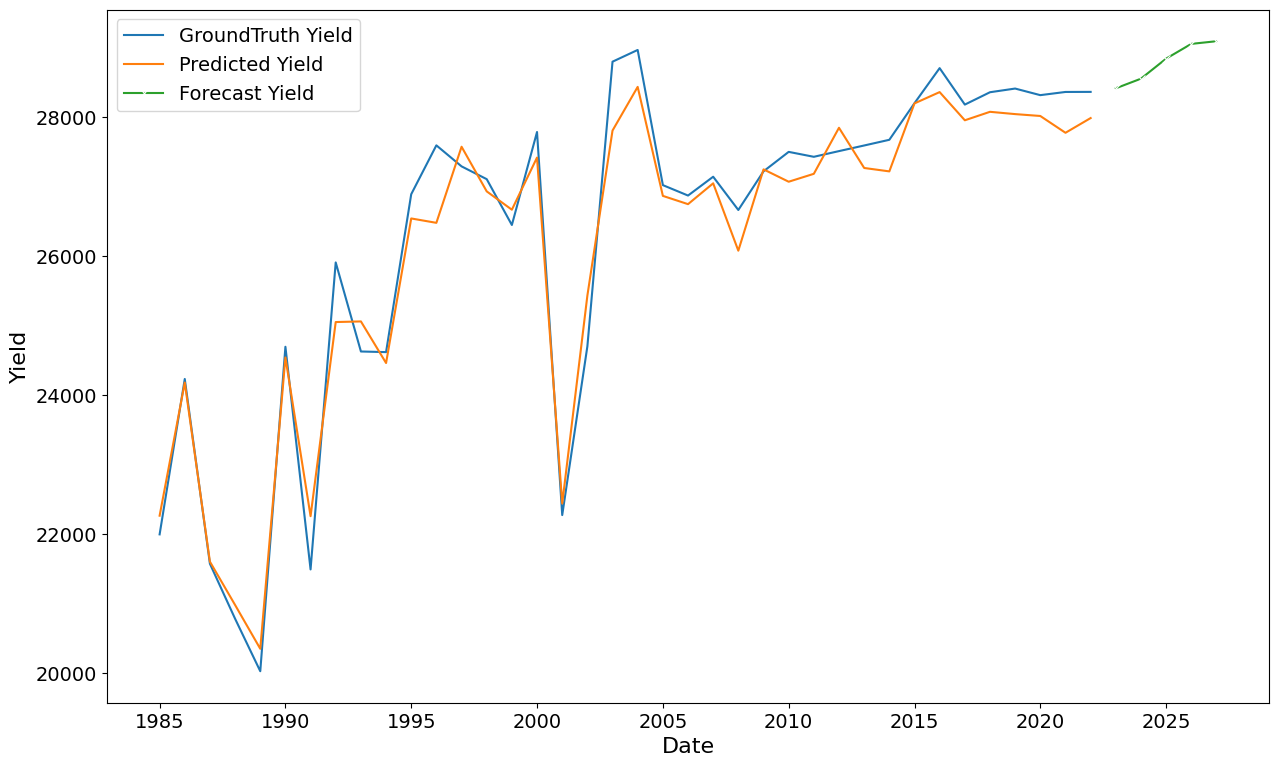

In [30]:
import matplotlib.pyplot as plt
date_range = pd.date_range(start='2022-12-31', periods=len(future_yields), freq='A-DEC')
date_range = date_range.date
print(date_range)

dataset = pd.read_csv("Monthly_dataset_1.csv")

new_data = pd.DataFrame({'date':date_range, 'Yield':future_yields})
existing_data =pd.DataFrame({'date':dataset['date'], 'Yield':dataset['Yield']})

appended_data = pd.concat([existing_data,new_data], ignore_index=True)

date_known = pd.to_datetime(dataset['date'][time_steps:])
y_predict = [int(i) for i in scaled_pred]
print(y_predict)
y_known = dataset['Yield'][time_steps:]
date_forecast = pd.to_datetime(date_range)
y_forecast = future_yields


# plt.figure(figsize=(15, 9))
# sns.lineplot(x=date_known, y=y_known, label="GroundTruth Yield",)  # Add markers to the GroundTruth line
# sns.lineplot(x=date_known, y=y_predict, label='Predicted Yield', markers='--')  # Add markers to the Predicted line
# # sns.lineplot(x=date_forecast, y=y_forecast, label="Forecast Yield", marker='x')  # Add markers to the Forecast line
# plt.show()


plt.figure(figsize=(15, 9))
sns.lineplot(x=date_known, y=y_known, label="GroundTruth Yield")  # Add markers to the GroundTruth line
sns.lineplot(x=date_known, y=y_predict, label='Predicted Yield', markers='--')  # Add markers to the Predicted line
sns.lineplot(x=date_forecast, y=y_forecast, label="Forecast Yield", marker='x')  # Add markers to the Forecast line
plt.xlabel('Date', fontsize=16)  # Increase x-axis label font size
plt.ylabel('Yield', fontsize=16)  # Increase y-axis label font size
plt.xticks(fontsize=14)  # Increase x-axis tick label font size
plt.yticks(fontsize=14)  # Increase y-axis tick label font size
plt.legend(fontsize=14)  # Increase legend font size
# plt.grid()
plt.show()

In [43]:
model.save("Models/Final_model_overfit1.hdf5")
model.save_weights("Models/Final_modelWeights_overfit1.hdf5")

<Axes: xlabel='date', ylabel='Yield'>

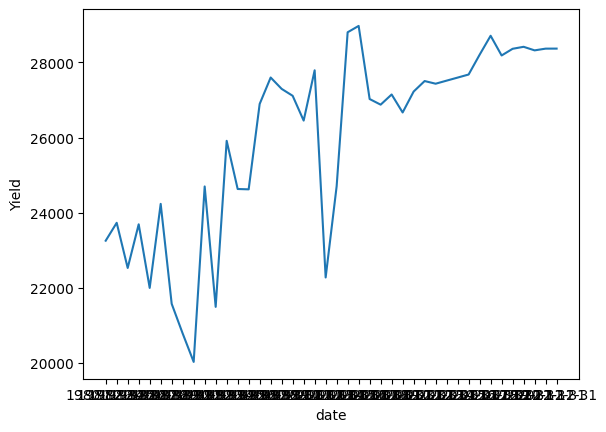

In [34]:
sns.lineplot(x=dataset['date'],y=dataset['Yield'])
sns.lineplot(x=dataset['date'])

In [45]:
y_pred_inv

array([[22264.877],
       [24181.28 ],
       [21602.451],
       [20979.691],
       [20347.088],
       [24543.734],
       [22257.006],
       [25053.893],
       [25062.703],
       [24463.096],
       [26545.938],
       [26482.592],
       [27578.736],
       [26935.984],
       [26671.254],
       [27422.293],
       [22439.686],
       [25434.828],
       [27811.793],
       [28440.223],
       [26870.531],
       [26751.973],
       [27051.385],
       [26081.072],
       [27252.164],
       [27074.287],
       [27188.58 ],
       [27851.857],
       [27272.006],
       [27223.605],
       [28202.348],
       [28365.354],
       [27959.195],
       [28081.072],
       [28048.469],
       [28021.027],
       [27779.906],
       [27991.707]], dtype=float32)

In [46]:
y_true_inv

array([[21995.],
       [24233.],
       [21572.],
       [20781.],
       [20024.],
       [24697.],
       [21490.],
       [25912.],
       [24629.],
       [24620.],
       [26894.],
       [27598.],
       [27295.],
       [27111.],
       [26451.],
       [27790.],
       [22273.],
       [24703.],
       [28803.],
       [28972.],
       [27025.],
       [26875.],
       [27146.],
       [26667.],
       [27224.],
       [27504.],
       [27433.],
       [27515.],
       [27596.],
       [27678.],
       [28205.],
       [28710.],
       [28185.],
       [28363.],
       [28416.],
       [28321.],
       [28367.],
       [28368.]])

In [47]:
date_known

4    1984-12-31
5    1985-12-31
6    1986-12-31
7    1987-12-31
8    1988-12-31
9    1989-12-31
10   1990-12-31
11   1991-12-31
12   1992-12-31
13   1993-12-31
14   1994-12-31
15   1995-12-31
16   1996-12-31
17   1997-12-31
18   1998-12-31
19   1999-12-31
20   2000-12-31
21   2001-12-31
22   2002-12-31
23   2003-12-31
24   2004-12-31
25   2005-12-31
26   2006-12-31
27   2007-12-31
28   2008-12-31
29   2009-12-31
30   2010-12-31
31   2011-12-31
32   2012-12-31
33   2013-12-31
34   2014-12-31
35   2015-12-31
36   2016-12-31
37   2017-12-31
38   2018-12-31
39   2019-12-31
40   2020-12-31
41   2021-12-31
Name: date, dtype: datetime64[ns]

In [51]:
datas = {'Date':list(date_known), 'Original Yield':list(y_true_inv[:,0]), 'Predicted Yield':list(y_pred_inv[:,0])}
dataframe = pd.DataFrame(datas)
dataframe

,Date,Original Yield,Predicted Yield
0,1984-12-31,21995.0,22264.876953
1,1985-12-31,24233.0,24181.279297
2,1986-12-31,21572.0,21602.451172
3,1987-12-31,20781.0,20979.691406
4,1988-12-31,20024.0,20347.087891
5,1989-12-31,24697.0,24543.734375
6,1990-12-31,21490.0,22257.005859
7,1991-12-31,25912.0,25053.892578
8,1992-12-31,24629.0,25062.703125
9,1993-12-31,24620.0,24463.095703


In [60]:

# Save the DataFrame to an Excel file
output_file = 'yield_predictions.xlsx'  # Change this to your desired file name
df.to_excel(output_file, index=False)

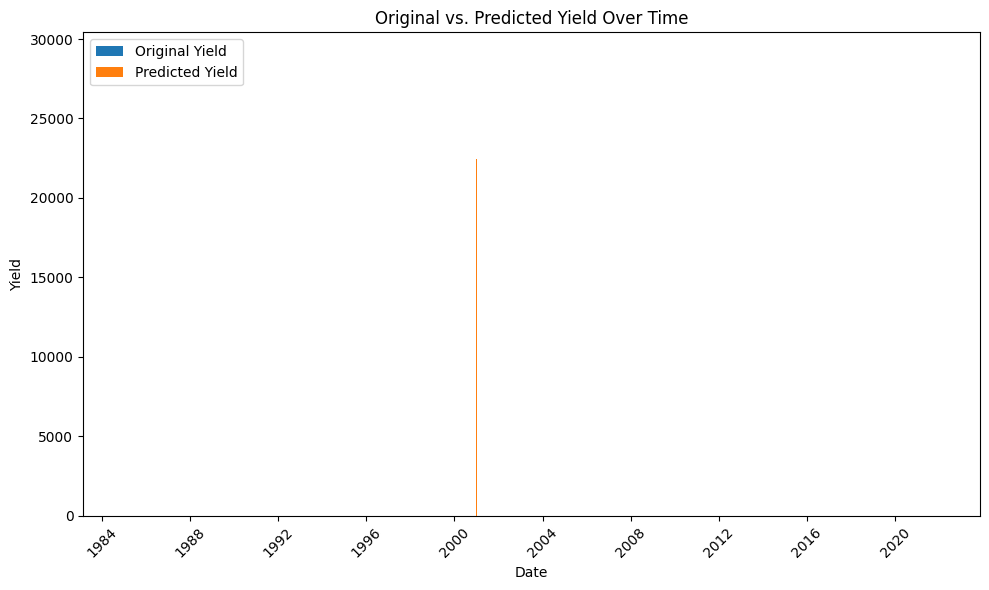

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
data = {
    'Date': ['1984-12-31', '1985-12-31', '1986-12-31', '1987-12-31', '1988-12-31', '1989-12-31', '1990-12-31', '1991-12-31', '1992-12-31', '1993-12-31', '1994-12-31', '1995-12-31', '1996-12-31', '1997-12-31', '1998-12-31', '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31'],
    'Original Yield': [21995.0, 24233.0, 21572.0, 20781.0, 20024.0, 24697.0, 21490.0, 25912.0, 24629.0, 24620.0, 26894.0, 27598.0, 27295.0, 27111.0, 26451.0, 27790.0, 22273.0, 24703.0, 28803.0, 28972.0, 27025.0, 26875.0, 27146.0, 26667.0, 27224.0, 27504.0, 27433.0, 27515.0, 27596.0, 27678.0, 28205.0, 28710.0, 28185.0, 28363.0, 28416.0, 28321.0, 28367.0, 28368.0],
    'Predicted Yield': [22264.876953, 24181.279297, 21602.451172, 20979.691406, 20347.087891, 24543.734375, 22257.005859, 25053.892578, 25062.703125, 24463.095703, 26545.937500, 26482.591797, 27578.736328, 26935.984375, 26671.253906, 27422.292969, 22439.685547, 25434.828125, 27811.792969, 28440.222656, 26870.531250, 26751.972656, 27051.384766, 26081.072266, 27252.164062, 27074.287109, 27188.580078, 27851.857422, 27272.005859, 27223.605469, 28202.347656, 28365.353516, 27959.195312, 28081.072266, 28048.468750, 28021.027344, 27779.906250, 27991.707031]
}

df = pd.DataFrame(data)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df['Date'], df['Original Yield'], width=0.4, label='Original Yield')
plt.bar(df['Date'], df['Predicted Yield'], width=0.4, label='Predicted Yield')
plt.xlabel('Date')
plt.ylabel('Yield')
plt.title('Original vs. Predicted Yield Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()